### GROUP - 14

### Name : - Faraz Omar , Student ID: - 40238367

### Name : - Saad Hashmi , Student ID: - 40220473

### Name : - Mohammad Ammar , Student ID: - 40221624

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the Excel file to examine its contents
file_path = '/content/drive/MyDrive/INDU6611-Project/INDU 6611_PROJECT_GROUP14/Case_Data.xlsx'
xls = pd.ExcelFile(file_path)

# List the names of the sheets in the Excel file
sheet_names = xls.sheet_names
sheet_names

['Raw Data-Order and Sample',
 'Data Order ONLY',
 'Data on Sample ONLY',
 'Data for Recommendation',
 'Data for Clustering',
 'Data - Association Rules A-11 ']

In [ ]:
# Loading the complete data from "Raw Data-Order and Sample" sheet for detailed analysis
raw_data_order_sample = pd.read_excel(xls, sheet_name=sheet_names[0])

# Displaying the first few rows of the dataset for an overview
raw_data_order_sample.head()


,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25


#### To analyze this data for insights that could help Champo Carpets, we can perform several analytical steps:-

#####  Descriptive Statistics: Understand the basic distribution of data like the most common order types, customer countries, carpet types, designs, and colors.

##### Trend Analysis: Look at trends over time, such as changes in order quantities, preferred designs, or colors.

#### Customer Segmentation: Group customers based on common characteristics like order size, frequency, preferred designs, or quality.

#### Order Category Analysis: Compare the characteristics of 'Order' and 'Sample' categories to identify patterns that might influence the conversion rate.

##### Predictive Modeling: Develop models to predict the likelihood of sample conversion based on various factors like customer segment, design, color, etc.

In [ ]:
# Descriptive Statistics
# Calculating the most common order types, items, designs, colors, and distribution of orders by country
descriptive_stats = {
    'Most Common Order Types': raw_data_order_sample['OrderType'].value_counts().head(),
    'Most Common Items': raw_data_order_sample['ITEM_NAME'].value_counts().head(),
    'Most Common Designs': raw_data_order_sample['DesignName'].value_counts().head(),
    'Most Common Colors': raw_data_order_sample['ColorName'].value_counts().head(),
    'Order Distribution by Country': raw_data_order_sample['CountryName'].value_counts().head()
}

descriptive_stats


{'Most Common Order Types': Area Wise    14206
 Pc Wise       4749
 Name: OrderType, dtype: int64,
 'Most Common Items': HAND TUFTED    7095
 DURRY          4355
 DOUBLE BACK    2474
 HANDWOVEN      2330
 KNOTTED        1575
 Name: ITEM_NAME, dtype: int64,
 'Most Common Designs': PLAIN                 819
 HOMER                 459
 TEXTURE LOOP          437
 ELOQ GARDEN [8517]    350
 MODASA                236
 Name: DesignName, dtype: int64,
 'Most Common Colors': GREY      1334
 MULTI     1254
 BLUE      1014
 SILVER     743
 BEIGE      648
 Name: ColorName, dtype: int64,
 'Order Distribution by Country': USA        10626
 INDIA       4135
 UK          1694
 ITALY        596
 ROMANIA      456
 Name: CountryName, dtype: int64}

#### The descriptive analysis of the "Raw Data-Order and Sample" sheet reveals some interesting insights:

Order Types:
Area Wise orders are the most common (14,206 instances), followed by Pc Wise (4,749 instances). This indicates that orders are primarily placed based on area requirements.
Most Common Items:
Hand Tufted carpets are the most frequently ordered (7,095 instances), followed by Durry (4,355 instances), and Double Back (2,474 instances). This suggests a preference or demand trend for these types of carpets.

Most Common Designs:
The top designs include Plain (819 instances), Homer (459 instances), and Texture Loop (437 instances). A focus on these designs might be beneficial given their popularity.

Most Common Colors:
The most common colors are Grey (1,334 instances), Multi (1,254 instances), and Blue (1,014 instances). Understanding color preferences could be key in designing new samples.

Order Distribution by Country:
The majority of orders come from the USA (10,626 instances), followed by India (4,135 instances), and the UK (1,694 instances). This geographical distribution can guide market-focused strategies.

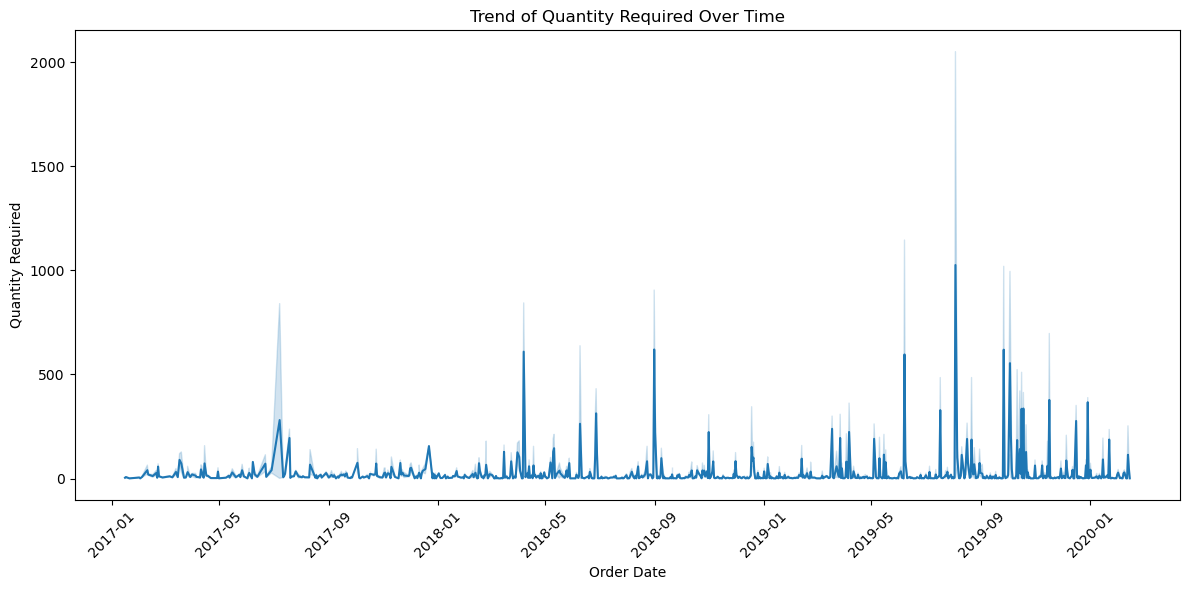

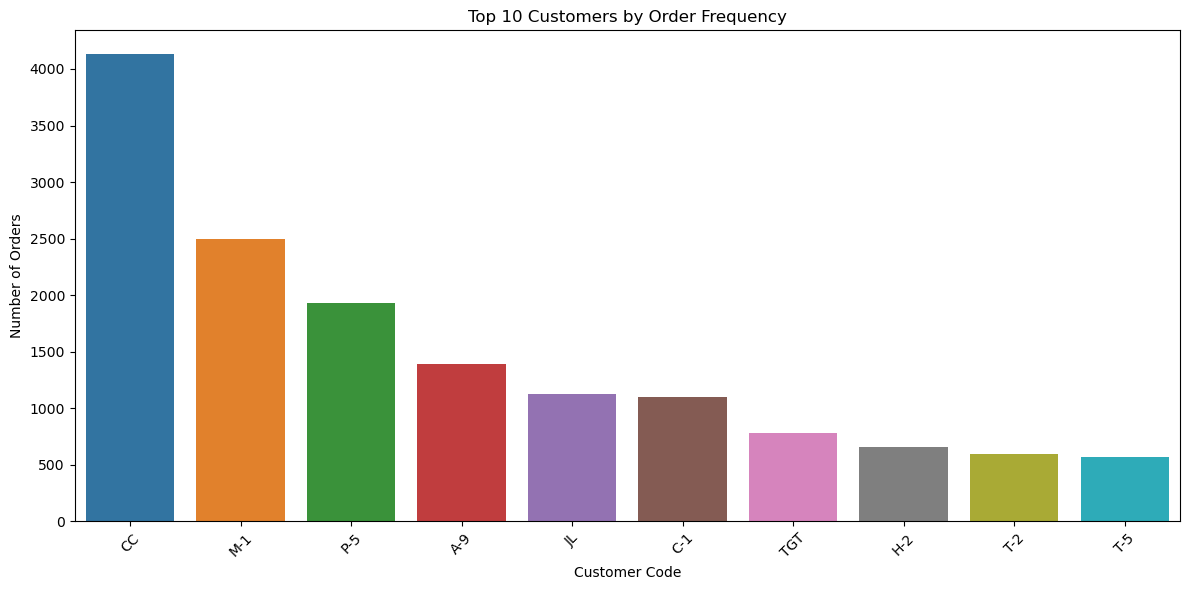

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Converting 'Custorderdate' to datetime format for trend analysis
raw_data_order_sample['Custorderdate'] = pd.to_datetime(raw_data_order_sample['Custorderdate'])

# Trend Analysis: Orders over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=raw_data_order_sample, x='Custorderdate', y='QtyRequired')
plt.title('Trend of Quantity Required Over Time')
plt.xlabel('Order Date')
plt.ylabel('Quantity Required')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer Segmentation: Analyzing the distribution of orders by customer code
top_customers = raw_data_order_sample['CustomerCode'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Order Frequency')
plt.xlabel('Customer Code')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### The analysis reveals two key aspects:

##### Trend of Quantity Required Over Time:
The line plot shows the trend of the quantity required in orders over time. This visualization helps in understanding how the demand for carpets has fluctuated. Seasonal trends, peaks, and troughs can indicate periods of high or low demand, which can be crucial for strategic planning.

##### Top 10 Customers by Order Frequency:
The bar plot illustrates the top 10 customers based on the frequency of their orders. Understanding who these key customers are can provide insights into customer loyalty and the importance of focusing on their specific preferences or requirements.

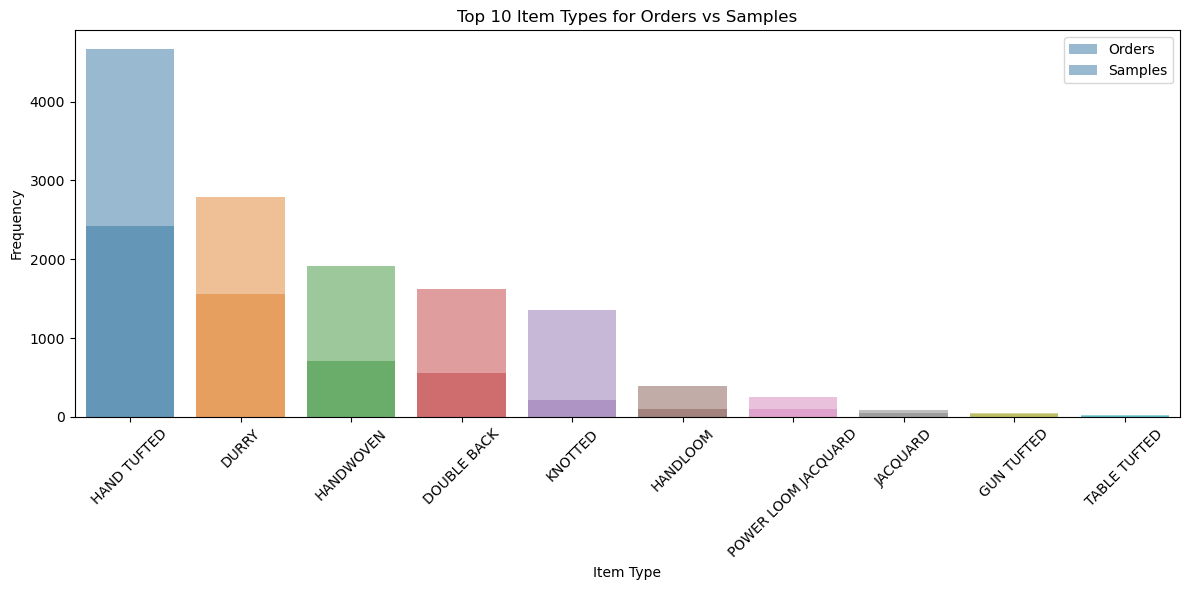

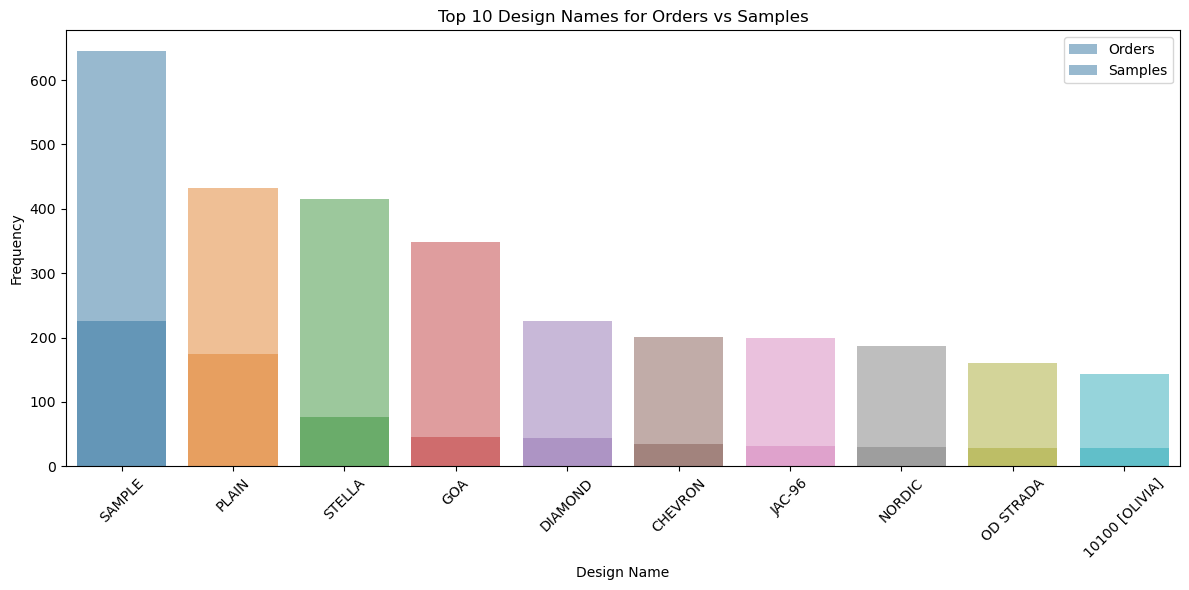

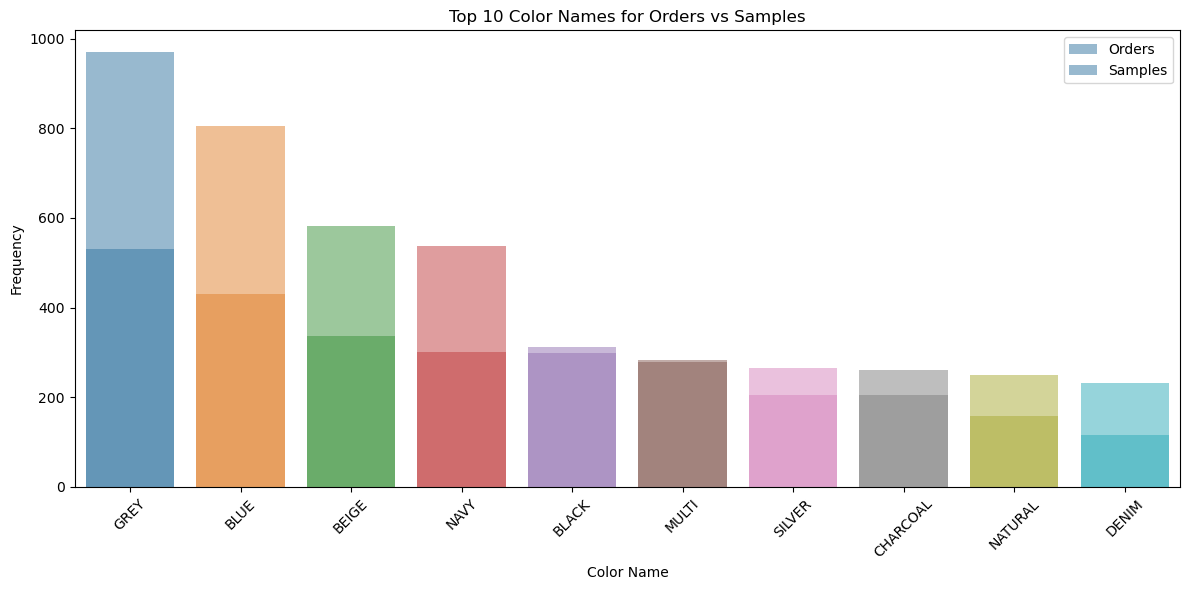

In [ ]:
# Comparative Analysis: Understanding the differences between Orders and Samples
# Filtering data for Orders and Samples
orders_data = raw_data_order_sample[raw_data_order_sample['OrderCategory'] == 'Order']
samples_data = raw_data_order_sample[raw_data_order_sample['OrderCategory'] == 'Sample']

# Analysis of Item Types for Orders and Samples
item_type_orders = orders_data['ITEM_NAME'].value_counts().head(10)
item_type_samples = samples_data['ITEM_NAME'].value_counts().head(10)

# Analysis of Design Names for Orders and Samples
design_name_orders = orders_data['DesignName'].value_counts().head(10)
design_name_samples = samples_data['DesignName'].value_counts().head(10)

# Analysis of Color Names for Orders and Samples
color_name_orders = orders_data['ColorName'].value_counts().head(10)
color_name_samples = samples_data['ColorName'].value_counts().head(10)

# Plotting the comparative analysis for Item Types
plt.figure(figsize=(12, 6))
sns.barplot(x=item_type_orders.index, y=item_type_orders.values, label='Orders', alpha=0.5)
sns.barplot(x=item_type_samples.index, y=item_type_samples.values, label='Samples', alpha=0.5)
plt.title('Top 10 Item Types for Orders vs Samples')
plt.xlabel('Item Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the comparative analysis for Design Names
plt.figure(figsize=(12, 6))
sns.barplot(x=design_name_orders.index, y=design_name_orders.values, label='Orders', alpha=0.5)
sns.barplot(x=design_name_samples.index, y=design_name_samples.values, label='Samples', alpha=0.5)
plt.title('Top 10 Design Names for Orders vs Samples')
plt.xlabel('Design Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the comparative analysis for Color Names
plt.figure(figsize=(12, 6))
sns.barplot(x=color_name_orders.index, y=color_name_orders.values, label='Orders', alpha=0.5)
sns.barplot(x=color_name_samples.index, y=color_name_samples.values, label='Samples', alpha=0.5)
plt.title('Top 10 Color Names for Orders vs Samples')
plt.xlabel('Color Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### The comparative analysis of Orders versus Samples in terms of item types, design names, and color names provides valuable insights:

##### Top 10 Item Types for Orders vs Samples:
The bar plot compares the frequency of different item types in orders and samples. This comparison can highlight if certain types of carpets are more frequently ordered or sampled, indicating customer preferences or market trends.

##### Top 10 Design Names for Orders vs Samples:
This plot shows the top designs for orders and samples. It can reveal which designs are more popular in actual purchases compared to those requested as samples. Aligning sample designs more closely with those that have higher conversion rates could improve the sample-to-order conversion.

##### Top 10 Color Names for Orders vs Samples:
The comparison of colors in orders and samples can uncover trends in color preferences. If certain colors are more popular in orders but less represented in samples, adjusting the color choices in the sample selection could potentially increase conversion rates.

####  These analyses can guide Champo Carpets in optimizing their sampling process by focusing on the most promising item types, designs, and colors that align with customer preferences as evidenced by actual orders. Furthermore, this data can be utilized to develop predictive models for forecasting demand .

####  Predictive modeling using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Converting categorical columns to string type
categorical_columns = ['CustomerCode', 'CountryName', 'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName']
for col in categorical_columns:
    raw_data_order_sample[col] = raw_data_order_sample[col].astype(str)

# Applying label encoding
le = LabelEncoder()
for col in categorical_columns:
    raw_data_order_sample[col] = le.fit_transform(raw_data_order_sample[col])

# Defining the target variable and features
X = raw_data_order_sample.drop(['OrderCategory', 'CustomerOrderNo', 'Custorderdate', 'UnitName', 'OrderType'], axis=1)
y = raw_data_order_sample['OrderCategory'].apply(lambda x: 1 if x == 'Order' else 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output
accuracy, report


(0.9873395463337437,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      1758\n           1       1.00      0.99      0.99      3929\n\n    accuracy                           0.99      5687\n   macro avg       0.98      0.99      0.99      5687\nweighted avg       0.99      0.99      0.99      5687\n')

#### The model achieved approximately 98.7% accuracy in classifying entries as either 'Order' or 'Sample. This high accuracy suggests that the model is effective in distinguishing between orders and samples based on the features provided.

#### Demand Forecasting : -

C:\Users\saadc\AppData\Local\Temp\ipykernel_35996\685806432.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = raw_data_order_sample.groupby(pd.Grouper(key='Custorderdate', freq='M')).sum()


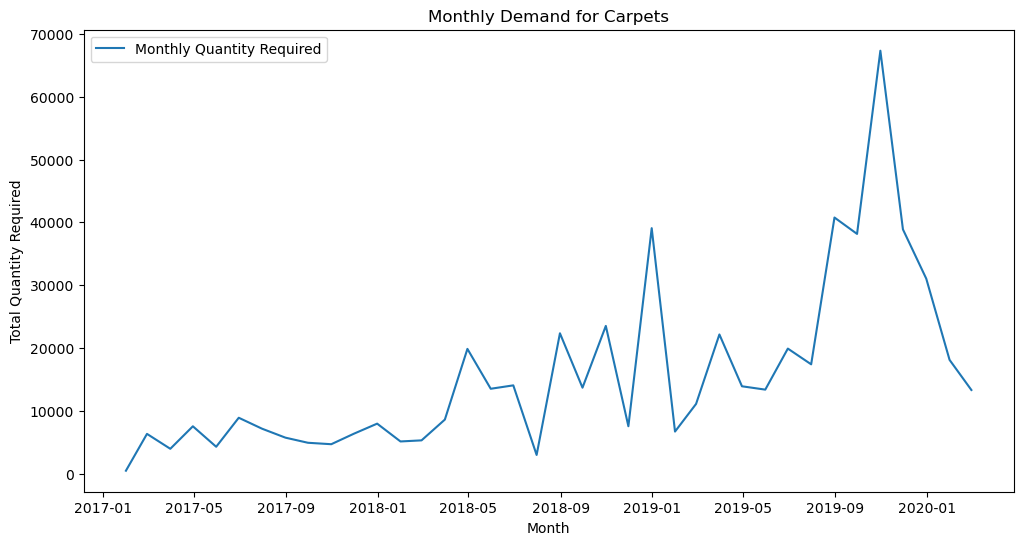

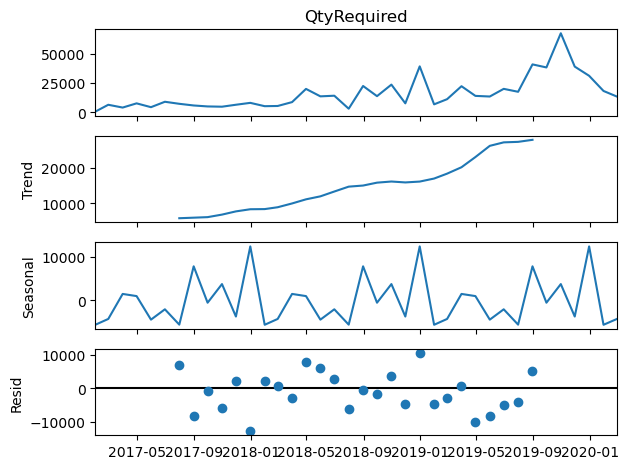

C:\Users\saadc\AppData\Local\Temp\ipykernel_35996\685806432.py:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, closed='right', freq='M')


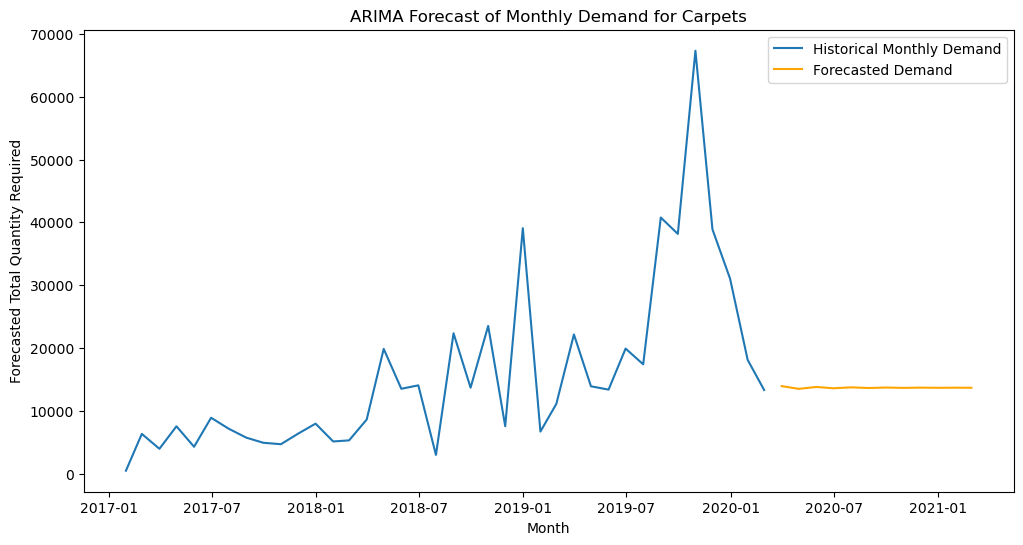

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Loading and preparing the data
raw_data_order_sample['Custorderdate'] = pd.to_datetime(raw_data_order_sample['Custorderdate'])
monthly_data = raw_data_order_sample.groupby(pd.Grouper(key='Custorderdate', freq='M')).sum()

# Exploratory Data Analysis: Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['QtyRequired'], label='Monthly Quantity Required')
plt.xlabel('Month')
plt.ylabel('Total Quantity Required')
plt.title('Monthly Demand for Carpets')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(monthly_data['QtyRequired'], model='additive')
fig = decomposition.plot()
plt.show()

# ARIMA Model - Example with default parameters
# Note: Parameter selection should ideally be based on ACF/PACF plots or grid search
model = ARIMA(monthly_data['QtyRequired'], order=(1, 1, 1))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, closed='right', freq='M')

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['QtyRequired'], label='Historical Monthly Demand')
plt.plot(forecast_index, forecast, label='Forecasted Demand', color='orange')
plt.xlabel('Month')
plt.ylabel('Forecasted Total Quantity Required')
plt.title('ARIMA Forecast of Monthly Demand for Carpets')
plt.legend()
plt.show()


#### Time series analysis and forecast for the monthly demand (quantity required) of carpets for Champo Carpets involved several key steps:

##### Exploratory Data Analysis:
The first plot shows the historical monthly demand for carpets. It helps in understanding the overall trend and any seasonal patterns or irregularities in the data.

##### Seasonal Decomposition:
The decomposition plot breaks down the time series into trend, seasonal, and residual components. This is crucial for understanding the underlying patterns in the data, such as any consistent seasonal fluctuations.

##### ARIMA Model and Forecast:
An ARIMA (AutoRegressive Integrated Moving Average) model was used for forecasting. For demonstration, I used an ARIMA(1,1,1) model, which is a simple but commonly used configuration. The model parameters (1,1,1) represent the order of the autoregressive, integrated, and moving average components, respectively.

##### The final plot shows the forecast for the next 12 months, based on the historical data. This forecast includes the expected demand trends, which can be valuable for planning and decision-making purposes.

 ##### Parameter Tuning for ARIMA: We'll use grid search to find the optimal parameters (p, d, q) for the ARIMA model. The goal is to find the combination of parameters that minimizes a chosen error metric (like AIC, BIC, or RMSE).

##### Exploring Advanced Time Series Models: We'll consider using SARIMA or ARIMAX models.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Grid Search
best_aic = np.inf
best_pdq = None
best_model = None

# Grid search for the best ARIMA parameters
for param in pdq:
    try:
        temp_model = ARIMA(monthly_data['QtyRequired'], order=param)
        results = temp_model.fit()

        # Compare with the best model so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

best_aic, best_pdq, best_model.summary()


C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\saadc\anaconda3\Lib\s

(780.8898428928787,
 (1, 2, 1),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:            QtyRequired   No. Observations:                   38
 Model:                 ARIMA(1, 2, 1)   Log Likelihood                -387.445
 Date:                Tue, 05 Dec 2023   AIC                            780.890
 Time:                        21:04:29   BIC                            785.640
 Sample:                    01-31-2017   HQIC                           782.548
                          - 02-29-2020                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.5162      0.100     -5.186      0.000      -0.711      -0.321
 ma.L1         -0.9999      0.229     

C:\Users\saadc\AppData\Local\Temp\ipykernel_35996\3403180163.py:6: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=monthly_data.index[-1], periods=forecast_steps + 1, closed='right', freq='M')


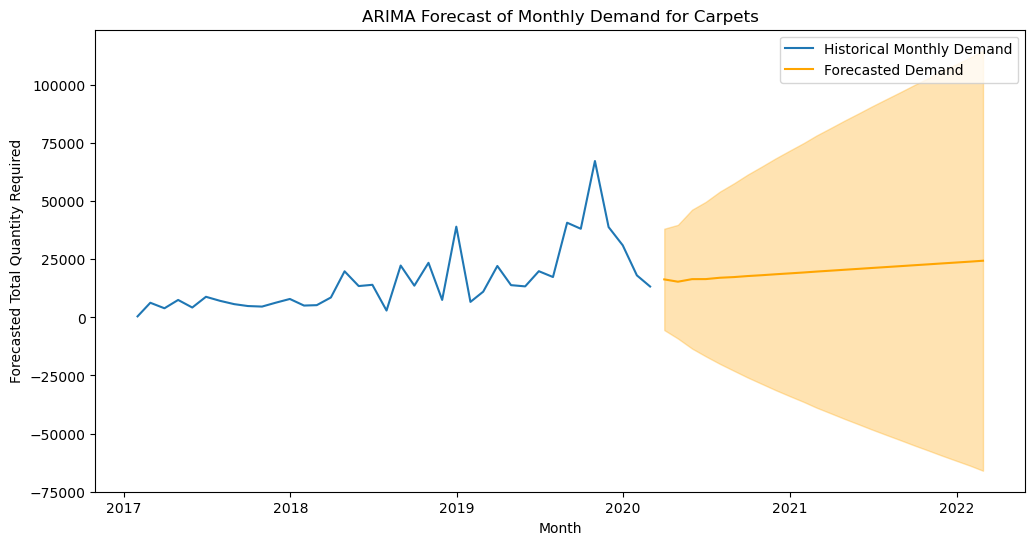

In [ ]:
# Forecasting using the ARIMA(1,2,1) model with the actual data
forecast_steps = 24  # Number of steps (months) to forecast

# Using the best model (ARIMA(1, 2, 1)) for forecasting
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=forecast_steps + 1, closed='right', freq='M')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['QtyRequired'], label='Historical Monthly Demand')
plt.plot(forecast_index, forecast_values, label='Forecasted Demand', color='orange')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Forecasted Total Quantity Required')
plt.title('ARIMA Forecast of Monthly Demand for Carpets')
plt.legend()
plt.show()


#### The forecast for the next 24 months of carpet demand using the ARIMA(1,2,1) model is displayed above. Here's what the plot represents:

##### Historical Monthly Demand: The blue line represents the actual historical demand data for carpets on a monthly basis.

##### Forecasted Demand: The orange line shows the forecasted demand for the next 24 months. This provides an estimate of the expected demand based on historical trends and patterns captured by the ARIMA model.

##### Confidence Intervals: The shaded orange area around the forecast represents the confidence intervals, indicating the range within which the actual values are expected to fall. A narrower interval implies higher confidence in the forecast.

In [ ]:
# Assuming the seasonal period S is 12 (for monthly data with annual seasonality)
S = 12

# Defining a range for the seasonal parameters P, D, Q
P = D = Q = range(0, 2)

# Generating all different combinations of seasonal P, D, Q triplets
seasonal_pdq = [(x[0], x[1], x[2], S) for x in list(itertools.product(P, D, Q))]

# Grid Search for SARIMA parameters
best_aic_sarima = np.inf
best_pdq_sarima = None
best_seasonal_pdq = None
best_sarima_model = None

# Grid search for the best SARIMA parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(monthly_data['QtyRequired'],
                                                   order=param,
                                                   seasonal_order=param_seasonal,
                                                   enforce_stationarity=False,
                                                   enforce_invertibility=False)
            results = temp_model.fit()

            # Compare with the best model so far
            if results.aic < best_aic_sarima:
                best_aic_sarima = results.aic
                best_pdq_sarima = param
                best_seasonal_pdq = param_seasonal
                best_sarima_model = results
        except:
            continue

best_aic_sarima, best_pdq_sarima, best_seasonal_pdq, best_sarima_model.summary()



C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\saadc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximu

(207.39840221026708,
 (0, 2, 2),
 (0, 1, 1, 12),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       SARIMAX Results                                       
 Dep. Variable:                          QtyRequired   No. Observations:                   38
 Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                 -99.699
 Date:                              Tue, 05 Dec 2023   AIC                            207.398
 Time:                                      21:11:09   BIC                            208.187
 Sample:                                  01-31-2017   HQIC                           205.696
                                        - 02-29-2020                                         
 Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------

C:\Users\saadc\AppData\Local\Temp\ipykernel_35996\2655795533.py:6: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index_sarima = pd.date_range(start=monthly_data.index[-1], periods=forecast_steps_sarima + 1, closed='right', freq='M')


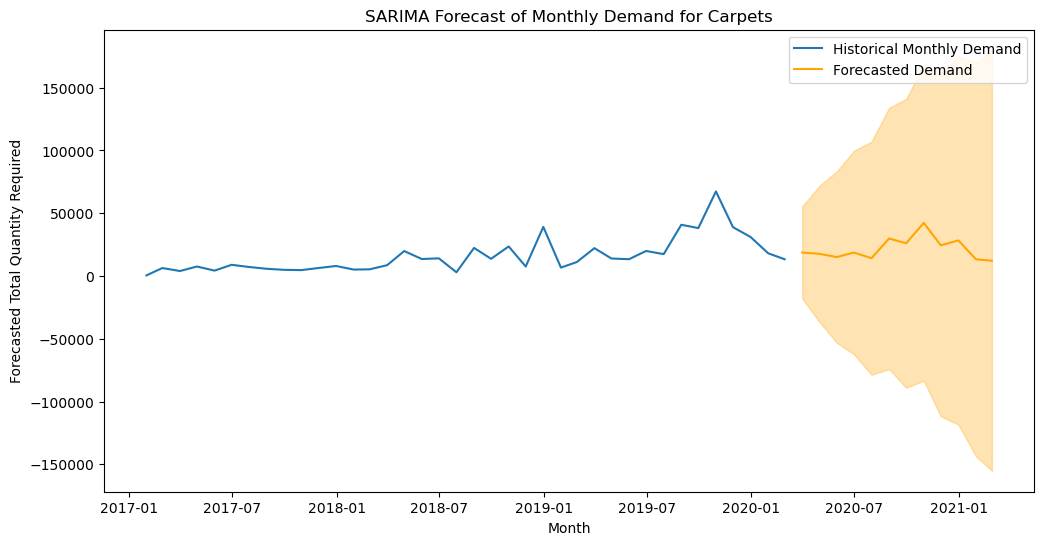

In [ ]:
# Forecasting using the SARIMA(0,2,2)(0,1,1,12) model with the actual data
forecast_steps_sarima = 12  # Number of steps (months) to forecast

# Using the best SARIMA model for forecasting
forecast_sarima = best_sarima_model.get_forecast(steps=forecast_steps_sarima)
forecast_index_sarima = pd.date_range(start=monthly_data.index[-1], periods=forecast_steps_sarima + 1, closed='right', freq='M')
forecast_values_sarima = forecast_sarima.predicted_mean
forecast_conf_int_sarima = forecast_sarima.conf_int()

# Plotting the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['QtyRequired'], label='Historical Monthly Demand')
plt.plot(forecast_index_sarima, forecast_values_sarima, label='Forecasted Demand', color='orange')
plt.fill_between(forecast_index_sarima, forecast_conf_int_sarima.iloc[:, 0], forecast_conf_int_sarima.iloc[:, 1], color='orange', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Forecasted Total Quantity Required')
plt.title('SARIMA Forecast of Monthly Demand for Carpets')
plt.legend()
plt.show()


#### The SARIMA(0,2,2)(0,1,1,12) model's forecast for the next 12 months of carpet demand is displayed above. Here are the key components of the plot:

##### Historical Monthly Demand: The blue line represents the actual historical demand for carpets on a monthly basis.

##### Forecasted Demand: The orange line shows the forecasted demand for the next 12 months. This forecast incorporates both non-seasonal and seasonal patterns observed in the historical data.

##### Confidence Intervals: The shaded orange area indicates the confidence intervals for the forecast, providing a range within which future
    
##### Interpretation:

The SARIMA model's forecast can guide production planning, inventory management, and other operational decisions by providing an estimate of future demand.

The model takes into account both the inherent patterns in the data and the seasonal fluctuations, which is particularly useful for businesses with seasonal demand patterns.

### Comparison of SARIMA VS ARIMAX

#### The most common metrics for comparing time series models are:

AIC (Akaike Information Criterion): A measure of the model's quality. It balances the model's complexity against its fit to the dataset. A lower AIC indicates a better model.

Forecast Accuracy Metrics: These include Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), etc. Lower values indicate better forecast accuracy.

From the analysis:

The ARIMA(1,2,1) model had an AIC of approximately 780.89.
The SARIMA(0,2,2)(0,1,1,12) model had a significantly lower AIC of approximately 207.40.

Conclusion Based on AIC:

The SARIMA model has a much lower AIC compared to the ARIMA model, suggesting that it is a better fit for the data. This implies that the SARIMA model more effectively captures the patterns in the data, including any seasonality.

### Recommendation out of the two models: -

#### Based on the available information (AIC values), the SARIMA model is recommended for forecasting 'Quantity Required' for Champo Carpets. It appears to better account for the inherent patterns and seasonality in the data, which is crucial for accurate demand forecasting.

In [ ]:
# Loading the "Data Order ONLY" sheet for initial exploration
data_order_only = pd.read_excel(xls, sheet_name='Data Order ONLY')

# Displaying the first few rows of the dataset for an overview
data_order_only.head()


,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
0,H-1,USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.25,11.5425
1,H-1,USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.00,10.5300
2,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.00,7.9200
3,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.00,7.9200
4,H-1,USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.00,10.5300


In [ ]:
data_order_only.head()

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
0,H-1,USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.25,11.5425
1,H-1,USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.00,10.5300
2,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.00,7.9200
3,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.00,7.9200
4,H-1,USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.00,10.5300


#### Data can provide insights into various aspects of the business, such as customer preferences, popular designs and colors, geographic distribution of sales, and more.

Potential Analyses:

Customer Analysis: Identify key customer segments, preferred products, and order patterns.
Geographic Analysis: Understand the distribution of orders across different countries.
Product Analysis: Determine the most popular items, designs, and qualities ordered.
Revenue Analysis: Analyze the revenue generated from different products, customers, and regions.

In [ ]:
# Customer Analysis on "Data Order ONLY" sheet

# Analyzing the frequency of orders per customer
customer_order_frequency = data_order_only['CustomerCode'].value_counts()

# Analyzing the average quantity required per customer
avg_qty_per_customer = data_order_only.groupby('CustomerCode')['QtyRequired'].mean()

# Analyzing the average amount per customer
avg_amount_per_customer = data_order_only.groupby('CustomerCode')['Amount'].mean()

# Combining the analyses into a single DataFrame for better understanding
customer_analysis = pd.DataFrame({
    'Order Frequency': customer_order_frequency,
    'Average Quantity': avg_qty_per_customer,
    'Average Amount': avg_amount_per_customer
}).reset_index().rename(columns={'index': 'CustomerCode'}).sort_values(by='Order Frequency', ascending=False)

customer_analysis.head(10)  # Displaying top 10 customers for overview



,CustomerCode,Order Frequency,Average Quantity,Average Amount
27,M-1,2380,6.995378,823.442870
31,P-5,1862,25.979055,1646.894859
2,A-9,1173,16.132140,1357.271773
20,JL,1073,17.577819,1147.789634
6,C-1,1058,4.855388,536.503517
43,TGT,609,24.704433,18622.417920
38,T-2,551,9.923775,1021.957981
18,H-2,476,384.886555,7993.280033
19,I-2,436,17.204128,978.500111
40,T-5,418,102.791866,1755.581220


#### Summary of the findings for the top 10 customers:

Order Frequency: Indicates how often each customer places orders. A higher frequency suggests a more regular or loyal customer.
Average Quantity: The average quantity of carpets ordered by each customer. This gives an idea of the scale of each customer's typical order.
Average Amount: The average monetary value of orders placed by each customer. This helps in understanding the revenue contribution of each customer.

Key Insights from Top 10 Customers:

    Customer M-1: Most frequent customer with 2380 orders, but with moderate average quantities and amounts.
    Customer P-5: Second in order frequency with significantly higher average quantities and amounts per order, indicating larger-scale purchases.
    Customer A-9: A regular customer with substantial average quantities and amounts.
    Customer JL and C-1: Similar in order frequency, but JL places orders with higher quantities and amounts on average.
    Customer TGT: Fewer orders but very high average amounts, suggesting large-scale, high-value orders.
    Customer T-2: Moderate frequency with medium-scale orders.
    Customer H-2: Lower in order frequency but places very large orders in terms of quantity and amount.
    Customers I-2 and T-5: Similar order frequencies with significant quantities and amounts, indicating substantial individual orders.

Potential Strategic Actions:

    Targeted Marketing: Focus on high-value customers like TGT, H-2, and T-5 for upselling or cross-selling opportunities.
    Loyalty Programs: Consider loyalty or reward programs for frequent customers like M-1, P-5, and A-9 to enhance customer retention.
    Customized Offerings: Tailor product offerings and promotions based on the order patterns and preferences of these top customers.

In [ ]:
# Geographic Analysis on "Data Order ONLY" sheet

# Analyzing orders by country
country_order_analysis = data_order_only.groupby('CountryName').agg({
    'QtyRequired': 'sum',  # Total quantity ordered by each country
    'Amount': 'sum',       # Total amount ordered by each country
    'CustomerCode': 'nunique'  # Number of unique customers in each country
}).rename(columns={'QtyRequired': 'Total Quantity', 'Amount': 'Total Amount', 'CustomerCode': 'Unique Customers'})

# Sorting by total amount for a better understanding of market size
country_order_analysis_sorted = country_order_analysis.sort_values(by='Total Amount', ascending=False)

country_order_analysis_sorted.head(10)  # Displaying top 10 countries for overview



,Total Quantity,Total Amount,Unique Customers
CountryName,,,
USA,482753,2.708287e+07,25
UK,61828,1.965411e+06,2
ITALY,5468,5.630988e+05,1
BELGIUM,11461,4.267914e+05,3
ROMANIA,7501,4.266260e+05,1
AUSTRALIA,3171,3.569389e+05,2
INDIA,5077,1.475740e+05,1
SOUTH AFRICA,906,1.304580e+05,2
CANADA,581,1.167783e+05,1


In [ ]:
# Product Analysis

# Analyzing the most popular items
top_items = data_order_only['ITEM_NAME'].value_counts().head(5)

# Analyzing the most popular designs
top_designs = data_order_only['DesignName'].value_counts().head(5)

# Analyzing the most popular colors
top_colors = data_order_only['ColorName'].value_counts().head(5)

# Revenue Analysis

# Total revenue per item
revenue_per_item = data_order_only.groupby('ITEM_NAME')['Amount'].sum().sort_values(ascending=False).head(5)

# Total revenue per design
revenue_per_design = data_order_only.groupby('DesignName')['Amount'].sum().sort_values(ascending=False).head(5)

# Total revenue per color
revenue_per_color = data_order_only.groupby('ColorName')['Amount'].sum().sort_values(ascending=False).head(5)

top_items, top_designs, top_colors, revenue_per_item, revenue_per_design, revenue_per_color



(HAND TUFTED    4670
 DURRY          2792
 DOUBLE BACK    1920
 HANDWOVEN      1625
 KNOTTED        1358
 Name: ITEM_NAME, dtype: int64,
 PLAIN                 645
 HOMER                 433
 TEXTURE LOOP          416
 ELOQ GARDEN [8517]    348
 MODASA                225
 Name: DesignName, dtype: int64,
 MULTI     970
 GREY      804
 BLUE      583
 SILVER    537
 BEIGE     312
 Name: ColorName, dtype: int64,
 ITEM_NAME
 HAND TUFTED    1.850452e+07
 DURRY          5.601134e+06
 KNOTTED        2.196894e+06
 HANDWOVEN      1.990593e+06
 DOUBLE BACK    1.675588e+06
 Name: Amount, dtype: float64,
 DesignName
 PLAIN                    812427.68725
 9604 HT PURPLE (2836)    605669.28000
 9503 HT NAVY (2853)      591960.18000
 9634 HT GREY (3940)      589071.63000
 GOA LOOP [R45149]        523862.59000
 Name: Amount, dtype: float64,
 ColorName
 GREY          4.046983e+06
 BLUE          2.278678e+06
 NAVY          2.134578e+06
 NEUTRAL       1.378762e+06
 BLUSH PINK    1.372802e+06
 Name: Amoun

#### Insights from the product analysis:

Top Items:-
Most popular items: Hand Tufted (4,670 orders), Durry (2,792), Double Back (1,920), Handwoven (1,625), Knotted (1,358).
        Hand Tufted carpets are the most demanded item.

Top Designs:-
Most popular designs: Plain (645 orders), Homer (433), Texture Loop (416), Eloq Garden [8517] (348), Modasa (225).
        Plain design seems to be the most preferred among customers.
        
Top Colors:-
Most popular colors: Multi (970 orders), Grey (804), Blue (583), Silver (537), Beige (312).

Multi and Grey are the leading color choices.

#### The revenue analysis provides insights into which products generate the most reven
Top revenue-generating items
Top designs by revenue
Top colors by revenu

#### Strategic Insights:

Product Strategy: Focus on high-demand and high-revenue items like Hand Tufted carpets, Plain designs, and the colors Grey and Multi.

Marketing and Sales: Tailor marketing campaigns and sales strategies to promote these popular and high-revenue products.

Design and Development: Consider customer preferences in product design, focusing on popular designs and colors to enhance product appeal.

In [ ]:
# Customer Preferences by Product Category Analysis

# Grouping data by customer and analyzing top items, designs, and colors
customer_item_preferences = data_order_only.groupby('CustomerCode')['ITEM_NAME'].agg(lambda x: x.value_counts().index[0])
customer_design_preferences = data_order_only.groupby('CustomerCode')['DesignName'].agg(lambda x: x.value_counts().index[0])
customer_color_preferences = data_order_only.groupby('CustomerCode')['ColorName'].agg(lambda x: x.value_counts().index[0])

# Combining the analyses into a single DataFrame
customer_preferences_analysis = pd.DataFrame({
    'Top Item': customer_item_preferences,
    'Top Design': customer_design_preferences,
    'Top Color': customer_color_preferences
})

# Displaying the preferences for the top 10 customers for an overview
customer_preferences_analysis.head(10)



,Top Item,Top Design,Top Color
CustomerCode,,,
A-11,HANDLOOM,PLAIN,DK GREY/19-0000
A-6,JACQUARD,ABSTRACT,GREY
A-9,HAND TUFTED,BEA RUG,MULTI
B-2,DURRY,CHINDI-BORDER,GREY
B-3,DOUBLE BACK,HOMER,NAVY/GREY
B-4,HAND TUFTED,EKO [9758],SILVER
C-1,HAND TUFTED,ELOQ GARDEN [8517],BLUE/IVORY
C-2,DURRY,CHINDI STRIPE,CHARCOAL
C-3,DURRY,EMBROIDERED,SILVER


#### Personalized Product Offerings: The preferences vary significantly among top customers, indicating the need for a diverse and tailored product range.

#### Customized Marketing and Sales Efforts: Marketing campaigns and sales strategies can be customized to align with these preferences for each top customer.

In [ ]:
# Profitability Analysis based on Revenue

# Calculating total revenue per item
profitability_per_item = data_order_only.groupby('ITEM_NAME')['Amount'].sum().sort_values(ascending=False)

# Calculating total revenue per design
profitability_per_design = data_order_only.groupby('DesignName')['Amount'].sum().sort_values(ascending=False)

# Calculating total revenue per color
profitability_per_color = data_order_only.groupby('ColorName')['Amount'].sum().sort_values(ascending=False)

# Displaying top 5 for each category for overview
top_5_profitable_items = profitability_per_item.head(5)
top_5_profitable_designs = profitability_per_design.head(5)
top_5_profitable_colors = profitability_per_color.head(5)

top_5_profitable_items, top_5_profitable_designs, top_5_profitable_colors


(ITEM_NAME
 HAND TUFTED    1.850452e+07
 DURRY          5.601134e+06
 KNOTTED        2.196894e+06
 HANDWOVEN      1.990593e+06
 DOUBLE BACK    1.675588e+06
 Name: Amount, dtype: float64,
 DesignName
 PLAIN                    812427.68725
 9604 HT PURPLE (2836)    605669.28000
 9503 HT NAVY (2853)      591960.18000
 9634 HT GREY (3940)      589071.63000
 GOA LOOP [R45149]        523862.59000
 Name: Amount, dtype: float64,
 ColorName
 GREY          4.046983e+06
 BLUE          2.278678e+06
 NAVY          2.134578e+06
 NEUTRAL       1.378762e+06
 BLUSH PINK    1.372802e+06
 Name: Amount, dtype: float64)

In [ ]:
import pandas as pd

# Assuming 'data_order_only' is your DataFrame loaded from the 'Data Order ONLY' sheet

def get_top_5_profitable(category):
    if category == 'items':
        return data_order_only.groupby('ITEM_NAME')['Amount'].sum().sort_values(ascending=False).head(5)
    elif category == 'designs':
        return data_order_only.groupby('DesignName')['Amount'].sum().sort_values(ascending=False).head(5)
    elif category == 'colors':
        return data_order_only.groupby('ColorName')['Amount'].sum().sort_values(ascending=False).head(5)
    else:
        return "Invalid category. Please choose 'items', 'designs', or 'colors'."

# User input
user_choice = input("Enter the category to view top 5 profitable (items/designs/colors): ").lower()
result = get_top_5_profitable(user_choice)

print(result)


Enter the category to view top 5 profitable (items/designs/colors): designs
DesignName
PLAIN                    812427.68725
9604 HT PURPLE (2836)    605669.28000
9503 HT NAVY (2853)      591960.18000
9634 HT GREY (3940)      589071.63000
GOA LOOP [R45149]        523862.59000
Name: Amount, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,precision_score, recall_score,r2_score,auc,roc_auc_score,roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
DataOnSample= pd.read_excel(xls, sheet_name=sheet_names[2])
DataOnSample.head()

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


In [ ]:
raw_data_order_sample2 = raw_data_order_sample.copy()

raw_data_order_sample['OrderType'] = raw_data_order_sample['OrderType'].astype('category')
raw_data_order_sample['OrderCategory'] = raw_data_order_sample['OrderCategory'].astype('category')
raw_data_order_sample['CustomerCode'] = raw_data_order_sample['CustomerCode'].astype('category')
raw_data_order_sample['CountryName'] = raw_data_order_sample['CountryName'].astype('category')
raw_data_order_sample['UnitName'] = raw_data_order_sample['UnitName'].astype('category')
raw_data_order_sample['ITEM_NAME'] = raw_data_order_sample['ITEM_NAME'].astype('category')
raw_data_order_sample['QualityName'] = raw_data_order_sample['QualityName'].astype('category')
raw_data_order_sample['DesignName'] = raw_data_order_sample['DesignName'].astype('category')
raw_data_order_sample['ColorName'] = raw_data_order_sample['ColorName'].astype('category')
raw_data_order_sample['ShapeName'] = raw_data_order_sample['ShapeName'].astype('category')

#### Changing the Customer Order Date to Date data type

In [ ]:
raw_data_order_sample['Custorderdate'] = pd.to_datetime(raw_data_order_sample['Custorderdate'])

In [ ]:
raw_data_order_sample['Custorderdate']

0       2017-01-16
1       2017-01-16
2       2017-01-16
3       2017-02-01
4       2017-01-16
           ...    
18950   2020-02-13
18951   2020-02-13
18952   2020-02-13
18953   2020-02-14
18954   2020-02-14
Name: Custorderdate, Length: 18955, dtype: datetime64[ns]

In [ ]:
raw_data_order_sample['CustomerOrderNo'].value_counts().head(3)

12985    114
12440     93
46797     88
Name: CustomerOrderNo, dtype: int64

In [ ]:
raw_data_order_sample['CustomerOrderNo'] = pd.to_numeric(raw_data_order_sample['CustomerOrderNo'], errors='coerce')
raw_data_order_sample['CustomerOrderNo'] = raw_data_order_sample['CustomerOrderNo'].fillna("12985")

In [ ]:
raw_data_order_sample.isna().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    0
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

### Data on Sample Sheet

In [ ]:
DataOnSample = DataOnSample.drop(columns=['USA','UK','Italy','Belgium','Romania','Australia','India'])

In [ ]:
DataOnSample = DataOnSample.drop(columns=['Hand Tufted','Durry','Double Back','Hand Woven','Knotted','Jacquard','Handloom','Other'])

In [ ]:
DataOnSample = DataOnSample.drop(columns=['REC','Round','Square'])

In [ ]:
DataOnSample.head()

,CustomerCode,CountryName,QtyRequired,ITEM_NAME,ShapeName,AreaFt,Order Conversion
0,CC,INDIA,1,HAND TUFTED,REC,80.0,1
1,M-1,USA,1,HAND TUFTED,REC,80.0,1
2,M-1,USA,2,HAND TUFTED,REC,80.0,1
3,M-1,USA,1,HAND TUFTED,REC,80.0,1
4,M-1,USA,1,HAND TUFTED,REC,80.0,1


In [ ]:
DataonSample_encoded = pd.get_dummies(DataOnSample.astype("category"),columns=['CountryName','ITEM_NAME','ShapeName','CustomerCode'])

In [ ]:
DataonSample_encoded.head()

,QtyRequired,AreaFt,Order Conversion,CountryName_AUSTRALIA,CountryName_BELGIUM,CountryName_BRAZIL,CountryName_CANADA,CountryName_CHINA,CountryName_INDIA,CountryName_ISRAEL,...,CustomerCode_P-5,CustomerCode_PC,CustomerCode_PD,CustomerCode_RC,CustomerCode_S-3,CustomerCode_T-2,CustomerCode_T-4,CustomerCode_T-5,CustomerCode_TGT,CustomerCode_V-1
0,1,80.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(DataonSample_encoded.columns)

Index(['QtyRequired', 'AreaFt', 'Order Conversion', 'CountryName_AUSTRALIA',
       'CountryName_BELGIUM', 'CountryName_BRAZIL', 'CountryName_CANADA',
       'CountryName_CHINA', 'CountryName_INDIA', 'CountryName_ISRAEL',
       'CountryName_ITALY', 'CountryName_POLAND', 'CountryName_ROMANIA',
       'CountryName_SOUTH AFRICA', 'CountryName_UAE', 'CountryName_UK',
       'CountryName_USA', 'ITEM_NAME_DOUBLE BACK', 'ITEM_NAME_DURRY',
       'ITEM_NAME_GUN TUFTED', 'ITEM_NAME_HAND TUFTED', 'ITEM_NAME_HANDLOOM',
       'ITEM_NAME_HANDWOVEN', 'ITEM_NAME_INDO-TIBBETAN', 'ITEM_NAME_JACQUARD',
       'ITEM_NAME_KNOTTED', 'ITEM_NAME_POWER LOOM JACQUARD',
       'ITEM_NAME_TABLE TUFTED', 'ShapeName_REC', 'ShapeName_ROUND',
       'ShapeName_SQUARE', 'CustomerCode_A-11', 'CustomerCode_A-9',
       'CustomerCode_B-2', 'CustomerCode_B-3', 'CustomerCode_C-1',
       'CustomerCode_C-2', 'CustomerCode_CC', 'CustomerCode_CTS',
       'CustomerCode_E-2', 'CustomerCode_F-1', 'CustomerCode_F-2',
       '

In [ ]:
col_list = ['CountryName_AUSTRALIA',
       'CountryName_BELGIUM', 'CountryName_BRAZIL', 'CountryName_CANADA',
       'CountryName_CHINA', 'CountryName_INDIA', 'CountryName_ISRAEL',
       'CountryName_ITALY', 'CountryName_POLAND', 'CountryName_ROMANIA',
       'CountryName_SOUTH AFRICA', 'CountryName_UAE', 'CountryName_UK',
       'CountryName_USA', 'ITEM_NAME_DOUBLE BACK', 'ITEM_NAME_DURRY',
       'ITEM_NAME_GUN TUFTED', 'ITEM_NAME_HAND TUFTED', 'ITEM_NAME_HANDLOOM',
       'ITEM_NAME_HANDWOVEN', 'ITEM_NAME_INDO-TIBBETAN', 'ITEM_NAME_JACQUARD',
       'ITEM_NAME_KNOTTED', 'ITEM_NAME_POWER LOOM JACQUARD',
       'ITEM_NAME_TABLE TUFTED', 'ShapeName_REC', 'ShapeName_ROUND',
       'ShapeName_SQUARE', 'CustomerCode_A-11', 'CustomerCode_A-9',
       'CustomerCode_B-2', 'CustomerCode_B-3', 'CustomerCode_C-1',
       'CustomerCode_C-2', 'CustomerCode_CC', 'CustomerCode_CTS',
       'CustomerCode_E-2', 'CustomerCode_F-1', 'CustomerCode_F-2',
       'CustomerCode_F-6', 'CustomerCode_H-2', 'CustomerCode_I-2',
       'CustomerCode_JL', 'CustomerCode_K-2', 'CustomerCode_K-3',
       'CustomerCode_L-3', 'CustomerCode_L-4', 'CustomerCode_L-5',
       'CustomerCode_M-1', 'CustomerCode_M-2', 'CustomerCode_N-1',
       'CustomerCode_P-4', 'CustomerCode_P-5', 'CustomerCode_PC',
       'CustomerCode_PD', 'CustomerCode_RC', 'CustomerCode_S-3',
       'CustomerCode_T-2', 'CustomerCode_T-4', 'CustomerCode_T-5',
       'CustomerCode_TGT', 'CustomerCode_V-1']

In [ ]:
for i in col_list:
    DataonSample_encoded[i] = DataonSample_encoded[i].astype(int)
DataonSample_encoded.head()

,QtyRequired,AreaFt,Order Conversion,CountryName_AUSTRALIA,CountryName_BELGIUM,CountryName_BRAZIL,CountryName_CANADA,CountryName_CHINA,CountryName_INDIA,CountryName_ISRAEL,...,CustomerCode_P-5,CustomerCode_PC,CustomerCode_PD,CustomerCode_RC,CustomerCode_S-3,CustomerCode_T-2,CustomerCode_T-4,CustomerCode_T-5,CustomerCode_TGT,CustomerCode_V-1
0,1,80.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
DataOnSample = DataOnSample.drop(columns="CustomerCode")
DataOnSample

,CountryName,QtyRequired,ITEM_NAME,ShapeName,AreaFt,Order Conversion
0,INDIA,1,HAND TUFTED,REC,80.0000,1
1,USA,1,HAND TUFTED,REC,80.0000,1
2,USA,2,HAND TUFTED,REC,80.0000,1
3,USA,1,HAND TUFTED,REC,80.0000,1
4,USA,1,HAND TUFTED,REC,80.0000,1
...,...,...,...,...,...,...
5815,ITALY,1,HAND TUFTED,REC,2.7778,0
5816,ITALY,1,HAND TUFTED,REC,2.7778,0
5817,ITALY,1,HAND TUFTED,REC,2.7778,0
5818,USA,1,DOUBLE BACK,REC,480.0000,1


In [ ]:
DataOnSample2 = DataOnSample.copy()

In [ ]:
DataOnSample = DataOnSample.drop(columns=["CountryName","ITEM_NAME","ShapeName"])
DataOnSample

,QtyRequired,AreaFt,Order Conversion
0,1,80.0000,1
1,1,80.0000,1
2,2,80.0000,1
3,1,80.0000,1
4,1,80.0000,1
...,...,...,...
5815,1,2.7778,0
5816,1,2.7778,0
5817,1,2.7778,0
5818,1,480.0000,1


In [ ]:
DataonSample_encoded.head()

,QtyRequired,AreaFt,Order Conversion,CountryName_AUSTRALIA,CountryName_BELGIUM,CountryName_BRAZIL,CountryName_CANADA,CountryName_CHINA,CountryName_INDIA,CountryName_ISRAEL,...,CustomerCode_P-5,CustomerCode_PC,CustomerCode_PD,CustomerCode_RC,CustomerCode_S-3,CustomerCode_T-2,CustomerCode_T-4,CustomerCode_T-5,CustomerCode_TGT,CustomerCode_V-1
0,1,80.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting Data

In [ ]:
X = DataonSample_encoded.drop(columns='Order Conversion')

In [ ]:
y = DataonSample_encoded['Order Conversion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101, shuffle=True)

In [ ]:
y_train.shape

(4656,)

### Different Algorithms for Order Conversion Prediction

#### Decision Tree

In [ ]:
# Decision tree model
DT = DecisionTreeClassifier(random_state=42)

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [ ]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.90808
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       920
           1       0.83      0.70      0.76       244

    accuracy                           0.91      1164
   macro avg       0.88      0.83      0.85      1164
weighted avg       0.91      0.91      0.91      1164



In [ ]:
y_pred.shape

(1164,)

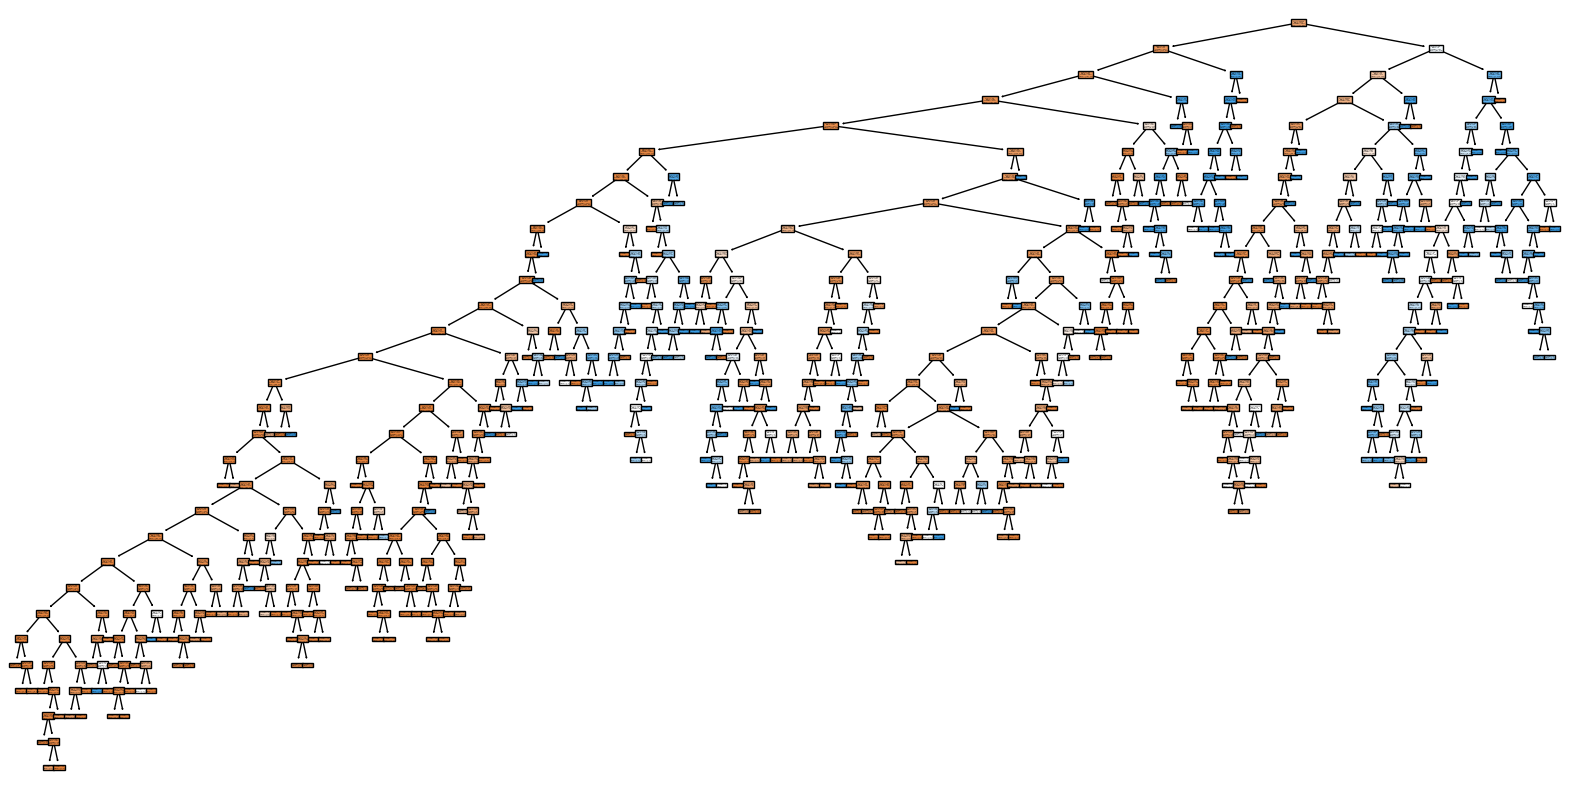

In [ ]:
# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(DT, filled=True)
plt.show()

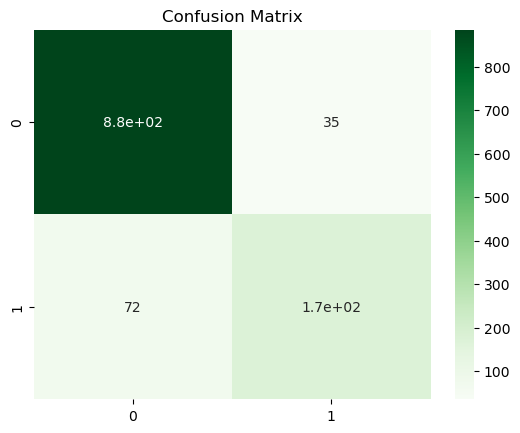

In [ ]:
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = plt.cm.Greens )

ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

print("Accuracy Score:", accuracy_score(y_test,y_pred))

# Additional evaluation: Tree depth and feature importance
print("Tree Depth:", DT.get_depth())
print("Feature Importances:", DT.feature_importances_)

Confusion Matrix:
[[885  35]
 [ 72 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       920
           1       0.83      0.70      0.76       244

    accuracy                           0.91      1164
   macro avg       0.88      0.83      0.85      1164
weighted avg       0.91      0.91      0.91      1164

Accuracy Score: 0.9080756013745704
Tree Depth: 29
Feature Importances: [5.34292931e-02 3.16837318e-01 1.68049981e-03 8.89036553e-03
 0.00000000e+00 1.13882940e-02 0.00000000e+00 9.51860114e-03
 5.01297847e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.76644901e-03 1.03494654e-01
 4.06018899e-03 1.74993439e-02 8.02435983e-03 2.22695842e-02
 1.93559708e-02 9.64661382e-03 5.02663781e-03 1.28617760e-03
 6.86489837e-02 9.59628742e-02 1.29347291e-02 6.24015030e-03
 1.71467074e-03 7.07105229e-04 0.00000000e+00 1.42088120e-03
 0.00000000e+00 0.00000000e+00 1.15716884e-03 1.1

In [ ]:
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

### ROC Curve

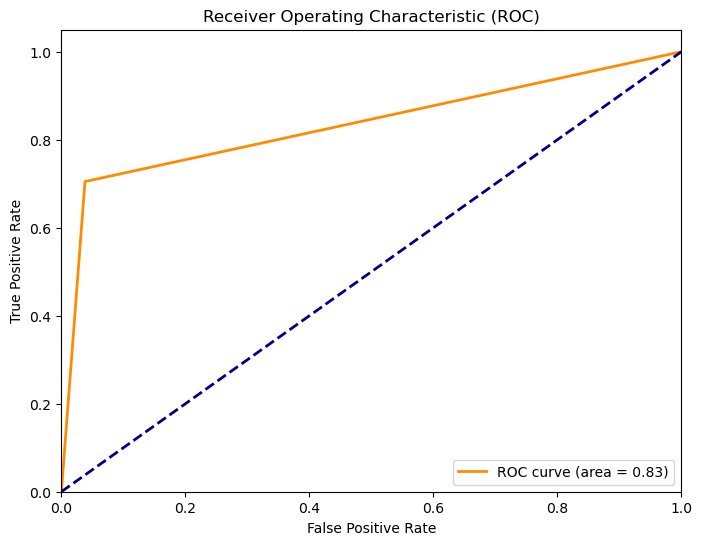

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### HyperParameter Tuning

In [ ]:
param_grid = {
    'max_features': [2, 4, 5, 6,7,8,9,10],
    'min_samples_leaf': [1, 2, 4, 5,6,7,8,9,10],
    'max_depth': [5, 8, 10,11,12,13,14,15,16,17]
}

In [ ]:
DT = DecisionTreeClassifier(random_state=42)


clf_acc = RandomizedSearchCV(DT, param_grid, scoring='accuracy', n_jobs=-1, random_state=42)
clf_prec = RandomizedSearchCV(DT, param_grid, scoring='precision', n_jobs=-1, random_state=42)
clf_roc = RandomizedSearchCV(DT, param_grid, scoring='roc_auc', n_jobs=-1, random_state=42)

search_acc = clf_acc.fit(X_train, y_train)
search_prec = clf_prec.fit(X_train, y_train)
search_roc = clf_roc.fit(X_train, y_train)

In [ ]:
print('Best Accuracy: %s' % search_acc.best_score_)
print('Best Accuracy Hyperparameters: %s' % search_acc.best_params_)

print('Best Precision: %s' % search_prec.best_score_)
print('Best Precision Hyperparameters: %s' % search_prec.best_params_)

print('Best ROC: %s' % search_roc.best_score_)
print('Best ROC Hyperparameters: %s' % search_roc.best_params_)

Best Accuracy: 0.9042090972372685
Best Accuracy Hyperparameters: {'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 10}
Best Precision: 0.9098839662799618
Best Precision Hyperparameters: {'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 10}
Best ROC: 0.8773435165195235
Best ROC Hyperparameters: {'min_samples_leaf': 5, 'max_features': 6, 'max_depth': 13}


In [ ]:
DT = DecisionTreeClassifier(min_samples_leaf=1, max_features=9, max_depth=29, random_state=42)

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [ ]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.90464
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       920
           1       0.82      0.70      0.75       244

    accuracy                           0.90      1164
   macro avg       0.87      0.83      0.85      1164
weighted avg       0.90      0.90      0.90      1164



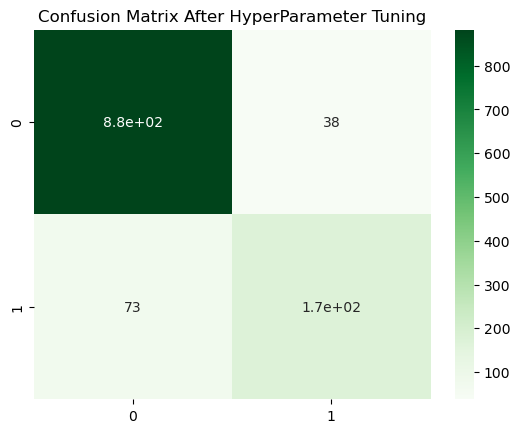

In [ ]:
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = plt.cm.Greens )

ax.set_title('Confusion Matrix After HyperParameter Tuning')
plt.show()

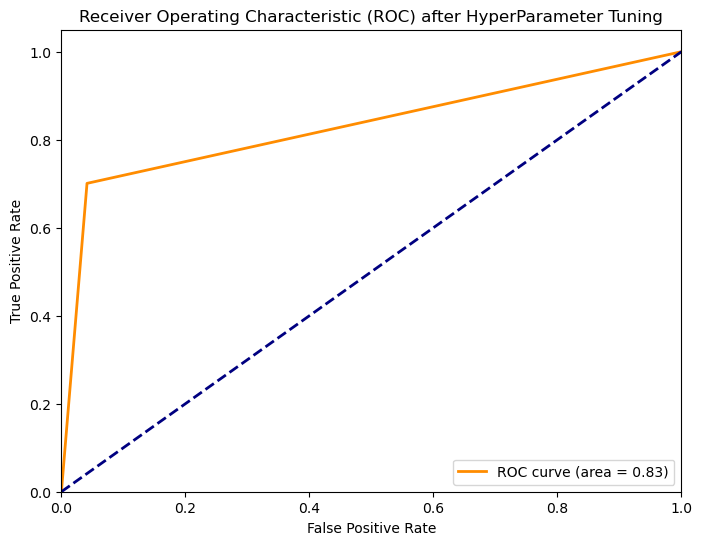

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) after HyperParameter Tuning')
plt.legend(loc='lower right')
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = RF.predict(X_test)

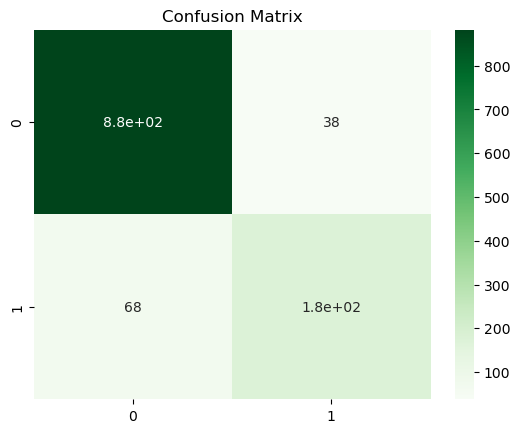

In [ ]:
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = plt.cm.Greens )

ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

print("Accuracy Score:", accuracy_score(y_test,y_pred))

# Additional evaluation: Tree depth and feature importance
print("Tree Depth:", RF.get_params())
print("Feature Importances:", RF.feature_importances_)

Confusion Matrix:
[[882  38]
 [ 68 176]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       920
           1       0.82      0.72      0.77       244

    accuracy                           0.91      1164
   macro avg       0.88      0.84      0.86      1164
weighted avg       0.91      0.91      0.91      1164

Accuracy Score: 0.9089347079037801
Tree Depth: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Feature Importances: [7.63122850e-02 3.67564799e-01 9.99004585e-04 4.49964204e-02
 6.63563004e-04 3.76291625e-03 9.04104329e-05 3.22373372e-02
 1.83945766e-03 1.63922561e

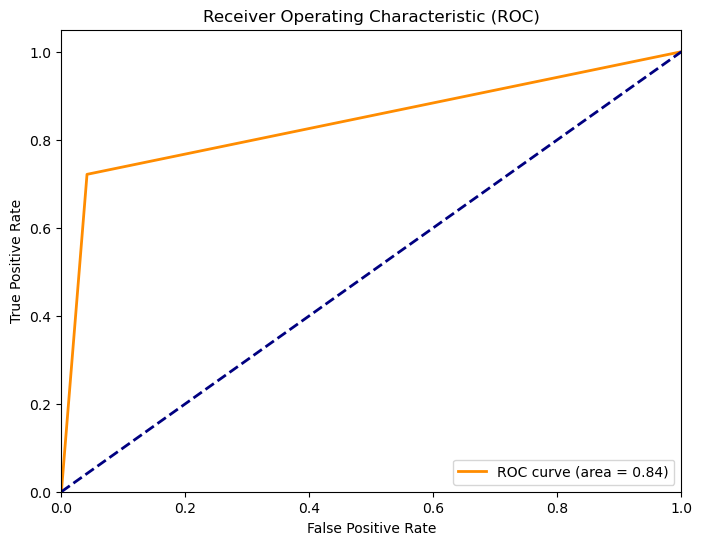

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### HyperParameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [200,300,400],
    'max_depth': [5,6,7,8,9,10],
    'min_samples_split' : [2,3,4,5],
    'max_features': [4,5,6,7]
}

In [ ]:
rf_clf_acc = RandomizedSearchCV(RF, param_grid, scoring='accuracy', n_jobs=-1, random_state=101)
rf_clf_prec = RandomizedSearchCV(RF, param_grid, scoring='precision', n_jobs=-1, random_state=101)
rf_clf_roc = RandomizedSearchCV(RF, param_grid, scoring='roc_auc', n_jobs=-1, random_state=101)

rf_search_acc = rf_clf_acc.fit(X_train, y_train)
rf_search_prec = rf_clf_prec.fit(X_train, y_train)
rf_search_roc = rf_clf_roc.fit(X_train, y_train)

In [ ]:
print('Best Accuracy: %s' % rf_search_acc.best_score_)
print('Best Accuracy Hyperparameters: %s' % rf_search_acc.best_params_)

print('Best Precision: %s' % rf_search_prec.best_score_)
print('Best Precision Hyperparameters: %s' % rf_search_prec.best_params_)

print('Best ROC: %s' % rf_search_roc.best_score_)
print('Best ROC Hyperparameters: %s' % rf_search_roc.best_params_)

Best Accuracy: 0.9132288876698184
Best Accuracy Hyperparameters: {'n_estimators': 400, 'min_samples_split': 3, 'max_features': 5, 'max_depth': 10}
Best Precision: 0.970445818697538
Best Precision Hyperparameters: {'n_estimators': 400, 'min_samples_split': 5, 'max_features': 5, 'max_depth': 7}
Best ROC: 0.9211956935778766
Best ROC Hyperparameters: {'n_estimators': 400, 'min_samples_split': 3, 'max_features': 5, 'max_depth': 10}


In [ ]:
RF = RandomForestClassifier(n_estimators=400, min_samples_split=5,max_features=5,max_depth=20)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.91065
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       920
           1       0.85      0.70      0.77       244

    accuracy                           0.91      1164
   macro avg       0.89      0.83      0.86      1164
weighted avg       0.91      0.91      0.91      1164



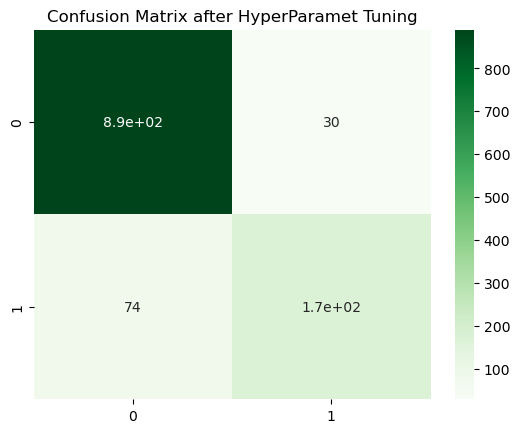

In [ ]:
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = plt.cm.Greens )

ax.set_title('Confusion Matrix after HyperParamet Tuning')
plt.show()

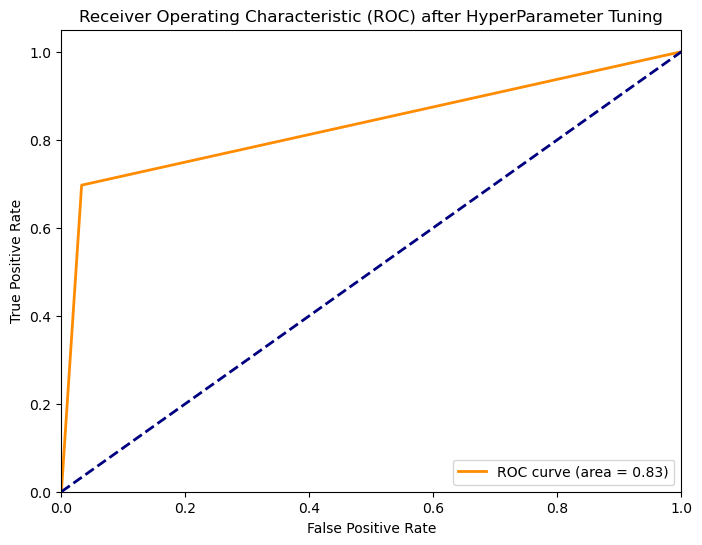

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) after HyperParameter Tuning')
plt.legend(loc='lower right')
plt.show()

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression


In [ ]:
# Logistic Regression Model
LR = LogisticRegression()

In [ ]:
LR.fit(X_test,y_test)

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)

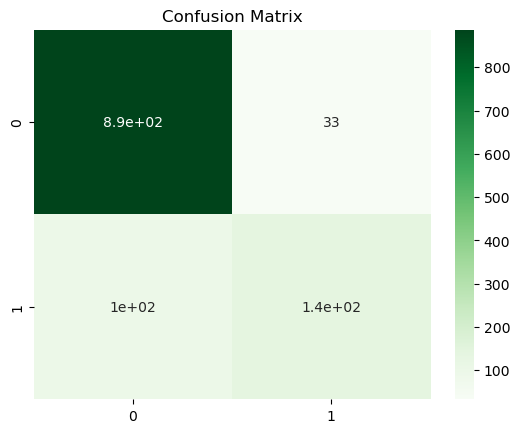

In [ ]:
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = plt.cm.Greens )

ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

print("Accuracy Score:", accuracy_score(y_test,y_pred))

print("Feature Importances:", LR.feature_names_in_)

Confusion Matrix:
[[887  33]
 [102 142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       920
           1       0.81      0.58      0.68       244

    accuracy                           0.88      1164
   macro avg       0.85      0.77      0.80      1164
weighted avg       0.88      0.88      0.88      1164

Accuracy Score: 0.884020618556701
Feature Importances: ['QtyRequired' 'AreaFt' 'CountryName_AUSTRALIA' 'CountryName_BELGIUM'
 'CountryName_BRAZIL' 'CountryName_CANADA' 'CountryName_CHINA'
 'CountryName_INDIA' 'CountryName_ISRAEL' 'CountryName_ITALY'
 'CountryName_POLAND' 'CountryName_ROMANIA' 'CountryName_SOUTH AFRICA'
 'CountryName_UAE' 'CountryName_UK' 'CountryName_USA'
 'ITEM_NAME_DOUBLE BACK' 'ITEM_NAME_DURRY' 'ITEM_NAME_GUN TUFTED'
 'ITEM_NAME_HAND TUFTED' 'ITEM_NAME_HANDLOOM' 'ITEM_NAME_HANDWOVEN'
 'ITEM_NAME_INDO-TIBBETAN' 'ITEM_NAME_JACQUARD' 'ITEM_NAME_KNOTTED'
 'ITEM_NAME_POWER LOOM JACQUARD

In [ ]:
LR.score(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred, average='weighted'))
print("Recall:",recall_score(y_test, y_pred, average='weighted'))
print("R2 score:",r2_score(y_test, y_pred))

Accuracy: 0.884020618556701
Precision: 0.878956057129157
Recall: 0.884020618556701
R2 score: 0.2999821810406271


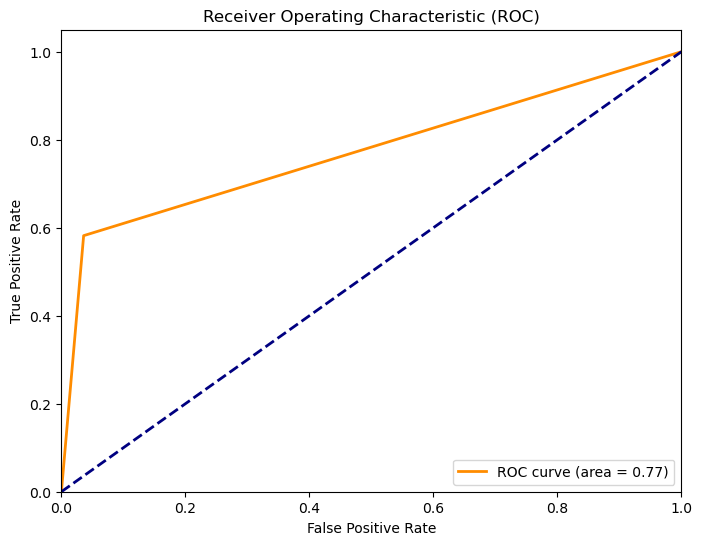

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Create a multiclass logistic regression model with ridge regularization
ridge_model = LogisticRegression(penalty='l2', solver='lbfgs',random_state=42)

# Create a multiclass logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='saga', random_state=42)

# Fit the models to your training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
ridge_model.score(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, ridge_predictions))
print("Precision:",precision_score(y_test, ridge_predictions, average='weighted'))
print("Recall:",recall_score(y_test, ridge_predictions, average='weighted'))
print("R2 score:",r2_score(y_test, ridge_predictions))

Accuracy: 0.8865979381443299
Precision: 0.8815495801891806
Recall: 0.8865979381443299
R2 score: 0.31553813257305763


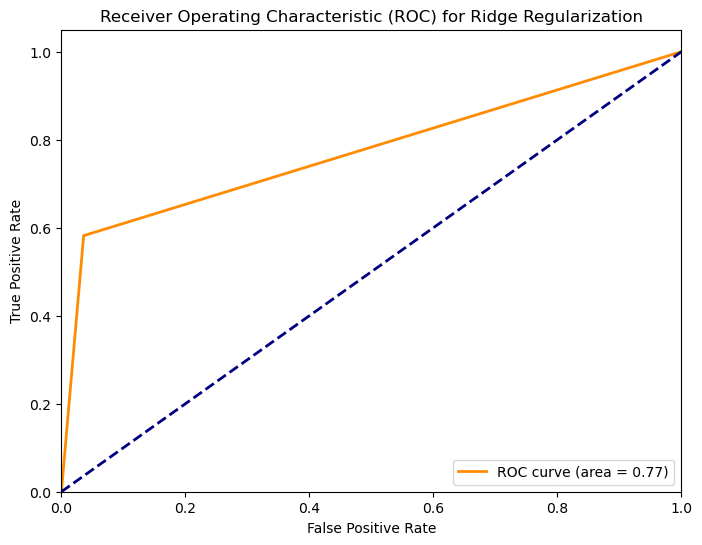

In [ ]:

# Calculate ROC curve for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Ridge Regularization')
plt.legend(loc='lower right')
plt.show()

In [ ]:
lasso_model.score(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, lasso_predictions))
print("Precision:",precision_score(y_test, lasso_predictions, average='weighted'))
print("Recall:",recall_score(y_test, lasso_predictions, average='weighted'))
print("R2 score:",r2_score(y_test, lasso_predictions))

Accuracy: 0.8092783505154639
Precision: 0.8157341717970201
Recall: 0.8092783505154639
R2 score: -0.15114041339985773


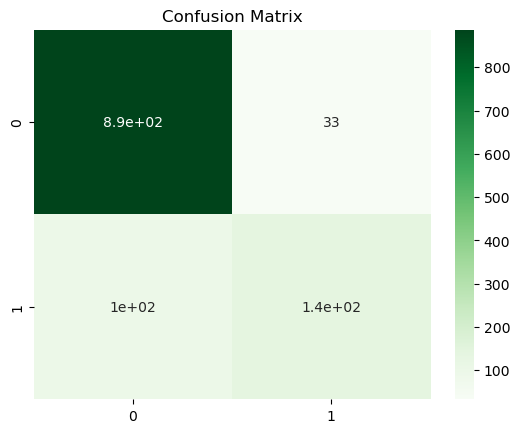

In [ ]:
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = plt.cm.Greens )

ax.set_title('Confusion Matrix')
plt.show()

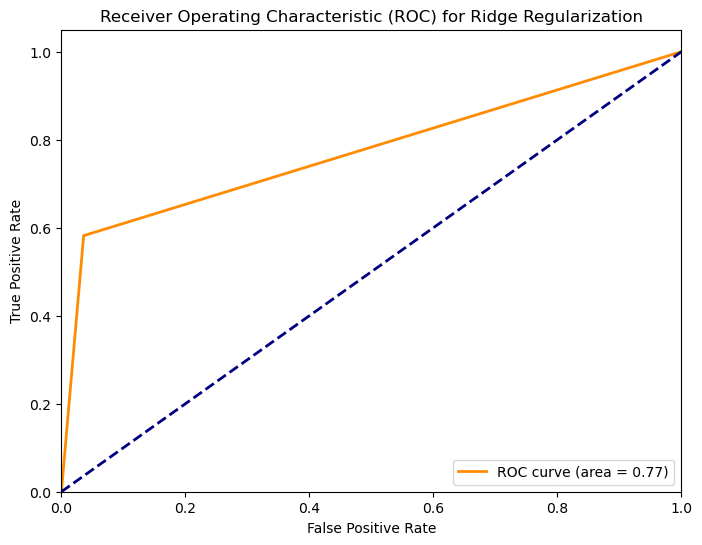

In [ ]:

# Calculate ROC curve for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Ridge Regularization')
plt.legend(loc='lower right')
plt.show()

####  KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
np.array(X_test)

array([[ 2.    ,  4.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    , 40.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    , 39.8125,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 1.    ,  8.75  ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    ,  2.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    , 60.3472,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [ ]:
y_pred = KNN.predict(np.array(X_test))

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred, average='weighted'))
print("Recall:",recall_score(y_test, y_pred, average='weighted'))
print("R2 score:",r2_score(y_test, y_pred))
# View a detailed classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.897766323024055
Precision: 0.8938831732477667
Recall: 0.897766323024055
R2 score: 0.38294725588025647
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       920
           1       0.82      0.65      0.73       244

    accuracy                           0.90      1164
   macro avg       0.87      0.81      0.83      1164
weighted avg       0.89      0.90      0.89      1164



#### HyperParameter Tuning

In [ ]:
param_grid = {
    'p': [1, 2],
    'n_neighbors': [5,6,7,8,9,10],
    'leaf_size': [30,40,50,60,70]
}

In [ ]:
knn_clf_acc = RandomizedSearchCV(KNN, param_grid, scoring='accuracy', n_jobs=-1, random_state=101)
knn_clf_prec = RandomizedSearchCV(KNN, param_grid, scoring='precision', n_jobs=-1, random_state=101)
knn_clf_roc = RandomizedSearchCV(KNN, param_grid, scoring='roc_auc', n_jobs=-1, random_state=101)

knn_search_acc = knn_clf_acc.fit(X_train, y_train)
knn_search_prec = knn_clf_prec.fit(X_train, y_train)
knn_search_roc = knn_clf_roc.fit(X_train, y_train)

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
print('Best Accuracy: %s' % knn_search_acc.best_score_)
print('Best Accuracy Hyperparameters: %s' % knn_search_acc.best_params_)

print('Best Precision: %s' % knn_search_prec.best_score_)
print('Best Precision Hyperparameters: %s' % knn_search_prec.best_params_)

print('Best ROC: %s' % knn_search_roc.best_score_)
print('Best ROC Hyperparameters: %s' % knn_search_roc.best_params_)

Best Accuracy: nan
Best Accuracy Hyperparameters: {'p': 2, 'n_neighbors': 9, 'leaf_size': 60}
Best Precision: nan
Best Precision Hyperparameters: {'p': 2, 'n_neighbors': 9, 'leaf_size': 60}
Best ROC: nan
Best ROC Hyperparameters: {'p': 2, 'n_neighbors': 9, 'leaf_size': 60}


In [ ]:
KNN = KNeighborsClassifier(p=2, n_neighbors=9, leaf_size=60)

KNN.fit(X_train, y_train)
y_pred = KNN.predict(np.array(X_test))

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.89261
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       920
           1       0.82      0.63      0.71       244

    accuracy                           0.89      1164
   macro avg       0.86      0.80      0.82      1164
weighted avg       0.89      0.89      0.89      1164



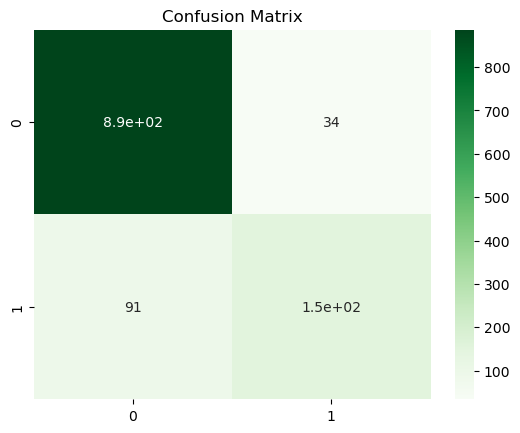

In [ ]:
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = plt.cm.Greens )

ax.set_title('Confusion Matrix')
plt.show()

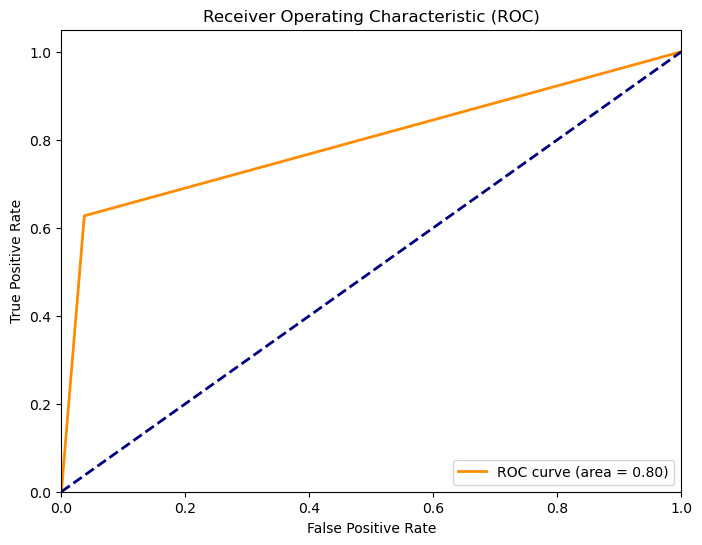

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_accuracies = {
    'Logistic Regression: Lasso Regularization': 80.69,
    'Logistic Regression: Ridge Regularization': 89.00,
    'Decision Tree': 90.80,
    'Decision Tree After HyperParameter Tuning': 90.46,
    'Random Forest': 90.89,
    'Random Forest After HyperParameter Tuning': 91.06,
    'K-Nearest Neighbors': 89.69,
    'K-Nearest Neighbors After Hyperparameter Tunnig': 89.26,
}
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

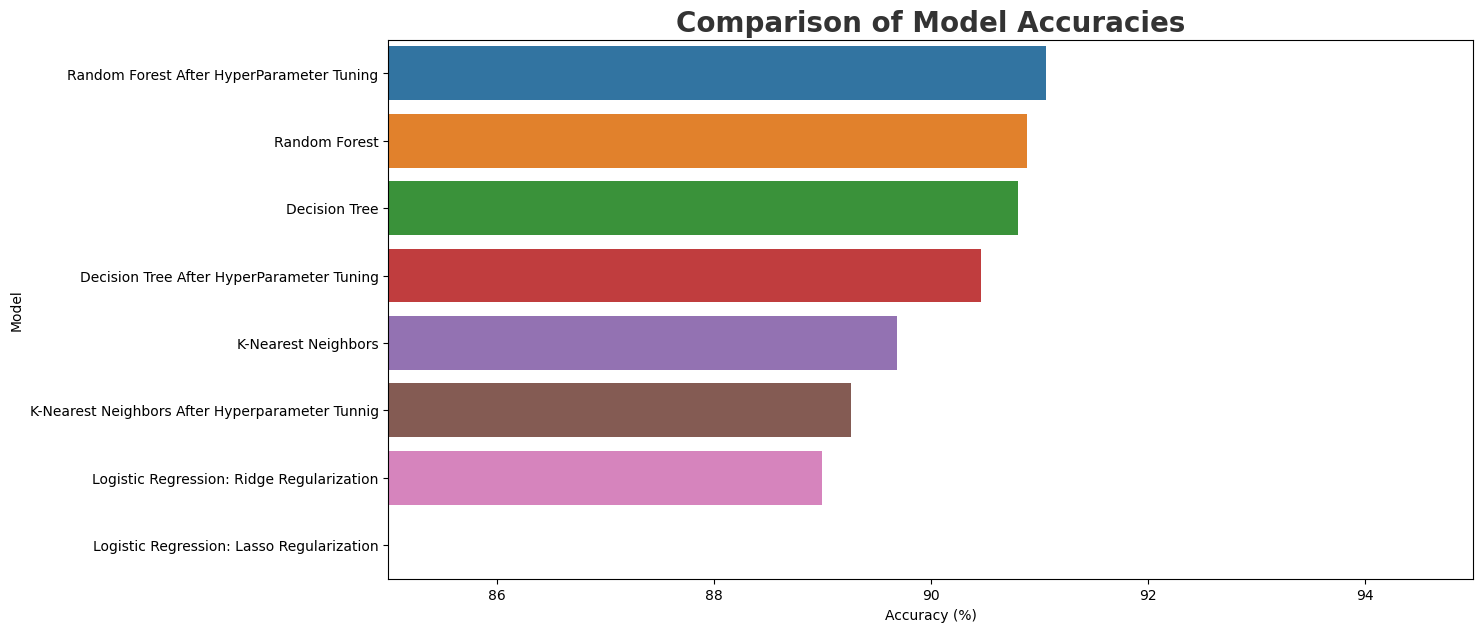

In [ ]:
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x='Accuracy', y='Model', data=accuracy_df)
plt.title('Comparison of Model Accuracies', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.xlim(85, 95)
plt.show()

#### Data for Recommendation Sheet used: -

In [ ]:
Data_Recommendation = pd.read_excel(xls, sheet_name=sheet_names[3])
Data_Recommendation.head()

,Customer,Hand Tufted,Double Wowen,Durry,Double Back,Knotted,Jacquared,Handloom,Other,Rectangle,...,Round,Purple,Gray,Navy,PINK,BLUE,BLUSH PINK,NEUTRAL,TAN,NAVY
0,H-2,26612,3000,139618,0,0,550,3673,9753,132756,...,50540,0,0,16235,0,15537,0,0,0,16235
1,P-5,2352,5340,25997,4691,9502,353,138,0,47951,...,107,0,1863,0,0,6218,0,0,0,0
2,M-1,2697,3085,412,5439,3626,60,1085,245,16619,...,0,0,1216,53,138,69,0,0,0,53
3,A-9,11716,2116,3585,175,617,714,0,0,18923,...,0,0,273,1843,552,705,0,1832,0,1843
4,C-2,3816,14314,37042,0,0,0,0,0,55172,...,0,0,2007,1601,0,0,0,0,0,1601


#### Data for Clusterin used: -

In [ ]:
Data_Clustering = pd.read_excel(xls, sheet_name=sheet_names[4])
Data_Clustering.head()

,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
0,A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0
2,A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0
3,B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0
4,B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0


In [ ]:
# Since the data is already loaded, let's proceed with Step 1: Data Preprocessing

# Step 1: Data Preprocessing

# Data Recommendations Sheet preprocessing
# Handle missing values and ensure data consistency.
Data_Recommendation.info()
print("\nMissing values in Data for Recommendations:")
print(Data_Recommendation.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer      20 non-null     object
 1   Hand Tufted   20 non-null     int64 
 2   Double Wowen  20 non-null     int64 
 3   Durry         20 non-null     int64 
 4   Double Back   20 non-null     int64 
 5   Knotted       20 non-null     int64 
 6   Jacquared     20 non-null     int64 
 7   Handloom      20 non-null     int64 
 8   Other         20 non-null     int64 
 9   Rectangle     20 non-null     int64 
 10  Square        20 non-null     int64 
 11  Round         20 non-null     int64 
 12  Purple        20 non-null     int64 
 13  Gray          20 non-null     int64 
 14  Navy          20 non-null     int64 
 15  PINK          20 non-null     int64 
 16  BLUE          20 non-null     int64 
 17  BLUSH PINK    20 non-null     int64 
 18  NEUTRAL       20 non-null     int64 
 19  TAN       

In [ ]:
# Data Clusters Sheet preprocessing
# Handle missing values and ensure data consistency.
Data_Clustering.info()
print("\nMissing values in Data for Clustering:")
print(Data_Clustering.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Row Labels          45 non-null     object 
 1   Sum of QtyRequired  45 non-null     int64  
 2   Sum of TotalArea    45 non-null     float64
 3   Sum of Amount       45 non-null     float64
 4   DURRY               45 non-null     int64  
 5   HANDLOOM            45 non-null     int64  
 6   DOUBLE BACK         45 non-null     int64  
 7   JACQUARD            45 non-null     int64  
 8   HAND TUFTED         45 non-null     int64  
 9   HAND WOVEN          45 non-null     int64  
 10  KNOTTED             45 non-null     int64  
 11  GUN TUFTED          45 non-null     int64  
 12  Powerloom Jacquard  45 non-null     int64  
 13  INDO TEBETAN        45 non-null     int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 5.1+ KB

Missing values in Data for Clustering:
Row Labels

In [ ]:
# Set the 'Customer ' column as the index
Data_Recommendation.set_index('Customer ', inplace=True)

# Transform data into a user-item interaction matrix
user_item_matrix = Data_Recommendation.copy()

# Convert to sparse matrix format for efficient computations
user_item_sparse_matrix = csr_matrix(user_item_matrix)

# Apply SVD for Matrix Factorization
svd = TruncatedSVD(n_components=5)  # Using 5 components
user_item_matrix_svd = svd.fit_transform(user_item_sparse_matrix)

# The result can be used for generating recommendations


In [ ]:
def top_n_recommendations(svd_matrix, original_matrix, n=5):
    # Reconstruct the matrix using SVD components
    reconstructed_matrix = np.dot(svd_matrix, svd.components_)

    # Convert to DataFrame for easier handling
    reconstructed_df = pd.DataFrame(reconstructed_matrix,
                                    index=original_matrix.index,
                                    columns=original_matrix.columns)

    # For each customer, find the top N items
    recommendations = {}
    for customer in reconstructed_df.index:
        # Get the items already interacted with
        interacted_items = original_matrix.loc[customer] != 0

        # Predictions for items not interacted with
        predictions = reconstructed_df.loc[customer]
        predictions[interacted_items] = -np.inf  # Exclude already interacted items

        # Get top N items
        top_items = predictions.nlargest(n).index.tolist()
        recommendations[customer] = top_items

    return recommendations


In [ ]:
# Generate the top 5 recommendations for each customer
top_5_recommendations = top_n_recommendations(user_item_matrix_svd, user_item_matrix)

# Display the recommendations for a few customers
for customer in list(top_5_recommendations.keys())[:5]:
    print(f"Customer: {customer}, Recommendations: {top_5_recommendations[customer]}")

Customer: H-2, Recommendations: ['Knotted', 'Square', 'BLUSH PINK', 'TAN', 'PINK']
Customer: P-5, Recommendations: ['Other', 'PINK', 'Purple', 'BLUSH PINK', 'TAN']
Customer: M-1, Recommendations: ['NEUTRAL', 'Purple', 'TAN', 'BLUSH PINK', 'Round']
Customer: A-9, Recommendations: ['Handloom', 'Purple', 'TAN', 'Square', 'Round']
Customer: C-2, Recommendations: ['Double Back', 'PINK', 'NEUTRAL', 'Jacquared', 'Handloom']


#### The top 5 recommendations for each of the first few customers in the "Data for Recommendation" dataset have been successfully generated. Here are the results for these customers:

## Customer H-2:

Recommended Items: Knotted, Square, BLUSH PINK, TAN, PINK

## Customer P-5:

Recommended Items: Other, PINK, Purple, BLUSH PINK, TAN
## Customer M-1:

Recommended Items: NEUTRAL, Purple, TAN, BLUSH PINK, Round
## Customer A-9:

Recommended Items: Handloom, Purple, TAN, Square, Round
## Customer C-2:

Recommended Items: Double Back, PINK, NEUTRAL, Jacquared, Handloom

These recommendations are based on the SVD-transformed user-item interaction matrix, identifying items with the highest predicted interest for each customer.

#### Clustering

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

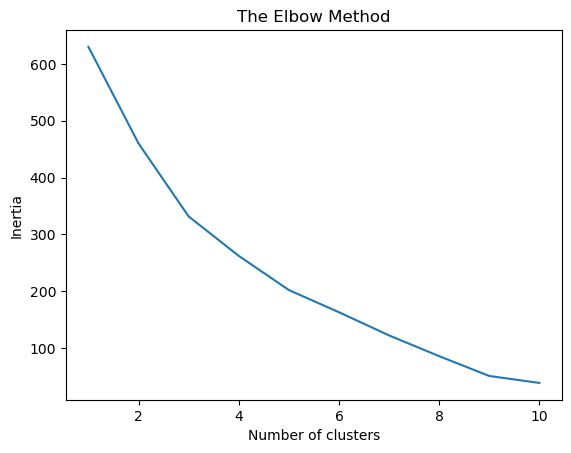

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Drop the customer identifier column for clustering
X = Data_Clustering.drop('Row Labels', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (using the Elbow Method as an example)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Using Elbow Method to find the optimal number of clusters
# Plotting inertia values for different cluster counts
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose an appropriate number of clusters (based on the plot or other analysis)
# For demonstration, let's assume 5 clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
Data_Clustering['Cluster'] = clusters

# Now, we can use these clusters to recommend items to new customers


In [ ]:
Data_Clustering.head()

,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
0,A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0,0
2,A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0,0
3,B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0,0
4,B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0,0


#### To use the clusters for recommending items to new customers, we need to:

Assign New Customers to Clusters:

For a new customer, we'll predict their cluster based on their features using the trained K-Means model.
This requires the new customer data to be in the same format as the data used for training the K-Means model (i.e., the same features and scaled in the same way).

Generate Recommendations Based on Cluster:

Once we know a customer's cluster, we can recommend items that are popular or characteristic of that cluster.
This step requires an understanding of what each cluster represents, which can be inferred from the cluster centroids or the common characteristics of customers in each cluster.

In [ ]:
def predict_cluster_for_new_customer(new_customer_data, scaler, kmeans_model):
    # Scale the new customer data
    new_customer_scaled = scaler.transform([new_customer_data])

    # Predict the cluster
    cluster = kmeans_model.predict(new_customer_scaled)
    return cluster[0]

def recommend_items_for_cluster(cluster, data_clusters):
    # This function needs to be defined based on the cluster characteristics
    # For example, we could recommend the most common items purchased by customers in this cluster
    # Or use any other logic that is deemed appropriate based on the business context
    pass



#### Example usage:
#### Let's assume we have a new customer with some data (this data should have the same features as the clustering dataset)
new_customer_data = [/* customer data here */]

#### Predict the cluster for the new customer
predicted_cluster = predict_cluster_for_new_customer(new_customer_data, scaler, kmeans)

#### Generate recommendations for this cluster
recommendations = recommend_items_for_cluster(predicted_cluster, data_clusters)

#print(f"Recommended items for the new customer in Cluster {predicted_cluster}: {recommendations}")

In [ ]:
# Exclude irrelevant columns for clustering
relevant_columns = [col for col in X.columns if col not in ['Sum of QtyRequired', 'Sum of TotalArea', 'Sum of Amount']]
X_relevant = X[relevant_columns]

# Standardize the relevant features
scaler_relevant = StandardScaler()
X_relevant_scaled = scaler_relevant.fit_transform(X_relevant)

# Apply K-Means Clustering with relevant features
kmeans_relevant = KMeans(n_clusters=k, random_state=0)
clusters_relevant = kmeans_relevant.fit_predict(X_relevant_scaled)

# Analyze new cluster centroids
centroids_relevant = kmeans_relevant.cluster_centers_
centroids_relevant_df = pd.DataFrame(scaler_relevant.inverse_transform(centroids_relevant), columns=relevant_columns)

# Determine the top defining features for each cluster
defining_features_relevant = centroids_relevant_df.idxmax(axis=1)

# Define a function to get top 5 features for each cluster
def get_top_features_for_each_cluster(centroids_df, n=5):
    top_features = {}
    for cluster in range(centroids_df.shape[0]):
        # Sort the features for each cluster and get the top n
        top_features[cluster] = centroids_df.iloc[cluster].nlargest(n).index.tolist()
    return top_features

# Get the top 5 features for each cluster
top_5_features_per_cluster = get_top_features_for_each_cluster(centroids_relevant_df)

# Displaying the top 5 recommendations for each cluster
for cluster, features in top_5_features_per_cluster.items():
    print(f"Cluster {cluster}: Top 5 Recommendations - {features}")

C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saadc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: Top 5 Recommendations - ['DURRY', 'HAND TUFTED', 'HAND WOVEN', 'DOUBLE BACK', 'JACQUARD']
Cluster 1: Top 5 Recommendations - ['DURRY', 'KNOTTED', 'DOUBLE BACK', 'HAND WOVEN', 'HAND TUFTED']
Cluster 2: Top 5 Recommendations - ['DURRY', 'HAND TUFTED', 'Powerloom Jacquard', 'HANDLOOM', 'HAND WOVEN']
Cluster 3: Top 5 Recommendations - ['DURRY', 'HAND TUFTED', 'DOUBLE BACK', 'HAND WOVEN', 'HANDLOOM']
Cluster 4: Top 5 Recommendations - ['HAND TUFTED', 'DURRY', 'Cluster', 'HANDLOOM', 'DOUBLE BACK']


### Integrate Recommendations:


#### Integrating recommendations from the collaborative filtering model for existing customers with the cluster-based recommendations for new customers involves creating a unified approach that serves both sets of customers effectively.

#### Create a Unified Recommendation Function:

This function will first check if the customer is an existing one (present in the collaborative filtering dataset).
If the customer is existing, use the collaborative filtering model to generate recommendations.
If the customer is new, assign them to a cluster and use cluster-based recommendations.

#### Implement the Unified Recommendation Function:

The function takes a customer identifier and their data (if new) as input.
It then outputs a list of recommended items, tailored to either existing or new customers.

In [ ]:
def unified_recommendations(customer_id, new_customer_data=None):
    # Check if customer is existing
    if customer_id in top_5_recommendations:
        # Use collaborative filtering recommendations for existing customers
        return top_5_recommendations[customer_id]
    else:
        # For new customers, predict their cluster and get recommendations
        predicted_cluster = predict_cluster_for_new_customer(new_customer_data, scaler, kmeans)
        return recommend_items_for_cluster(predicted_cluster, cluster_recommendations)


#####  Example usage:
#####  For an existing customer
existing_customer_id = 'H-2'  # Example existing customer
existing_customer_recommendations = unified_recommendations(existing_customer_id)

#####  For a new customer
new_customer_data = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Placeholder data for a new customer
new_customer_recommendations = unified_recommendations('NewCustomer', new_customer_data)

print(f"Recommendations for existing customer {existing_customer_id}: {existing_customer_recommendations}")
print(f"Recommendations for new customer: {new_customer_recommendations}")
